# House Prices Prediction

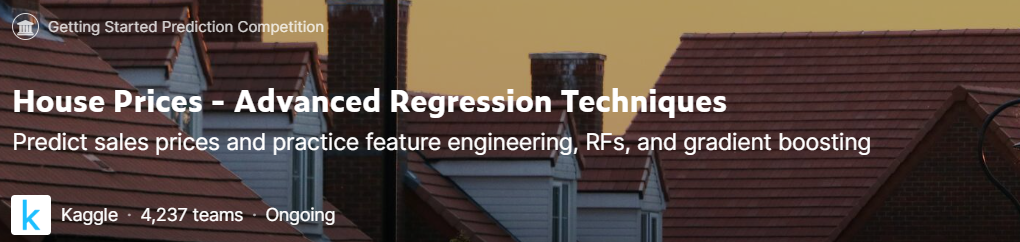


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 1. Import data

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.1 Importing necessary libraries

</div>


In [149]:

import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.2 Loading a CSV file into a DataFrame

</div>


In [150]:

df1 = pd.read_csv('train_house.csv')
dftest = pd.read_csv('test_data.csv')

In [151]:
df1.shape

(1460, 81)

In [152]:
dftest.shape

(1459, 80)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.3 Comparison of columns between the training and test sets
</div>


In [153]:
def compare_columns(df1, df2):
    # Get column names from both dataframes
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Check differences in columns
    columns_only_in_df1 = columns_df1 - columns_df2
    columns_only_in_df2 = columns_df2 - columns_df1

    # Print results
    print("Columns only in df1:", columns_only_in_df1)
    print("Columns only in df2:", columns_only_in_df2)


In [154]:
# Compare result
compare_columns(df1, dftest)

Columns only in df1: {'SalePrice'}
Columns only in df2: set()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨ Differences in the number of columns between the training and test sets:</span>
    <p style="font-size: 16px;">The observed disparities, especially the absence of the SalePrice column in the test set, are entirely understandable.</p>
    <p style="font-size: 16px;">🏡 In Kaggle competitions concerning house price prediction, the SalePrice column is typically omitted from the test set. This is because the main goal of the competition is precisely to predict this specific variable.</p>
    <p style="font-size: 16px;">🏡 This makes the task more realistic, reflecting situations where we do not have data on future property prices and our goal is to predict them.</p>
    <p style="font-size: 16px;">🏡In practice, when building a model to predict house prices based on new data, we will provide these data without the SalePrice column in the test set. The model predicts prices based on available features, simulating real-world conditions where we do not have information about future prices.</p>
   
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 2. Data Overview-Train Set

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.1 Data Shape

</div>

In [155]:
df = df1.drop('Id', axis=1)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.2 Data categories

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Key variables analysis:</span>
    <p style="font-size: 16px;">The observed disparities, especially the absence of the SalePrice column in the test set, are entirely understandable.</p>
    <p style="font-size: 16px;">🏡 One of the significant columns in this dataset is "SalePrice," which holds information about property prices. It is the target variable of analysis, serving as the subject of prediction or modeling.</p>
     <p style="font-size: 16px;">🏡 Another column, "ID," contains property identifiers, allowing the identification of individual objects in the dataset.</p>
    <p style="font-size: 16px;">🏡 The remaining 79 columns are explanatory variables. They contain various information about the properties, such as demographic data, location information, technical aspects, quality, condition, as well as information about the year of construction and other relevant details, which I will describe below.You can click on category and look at the data. Grouping in categories makes the analysis easier.</p>
   
   
</div>


In [156]:
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output

# Entry data
categories = {
   "General property information": ["SalePrice", "MSSubClass", "LotArea"],
    "Property type": ["BldgType", "HouseStyle"],
    "Lot shape information": ["LotShape", "LandContour"],
    "Road and location information": ["Street", "Alley", "LotFrontage", "Neighborhood", "MSZoning", "Utilities"],
    "Condition information": ["Condition1", "Condition2"],
    "Property quality  information": ["OverallQual", "OverallCond", "Functional"],
    "Age information": ["YearBuilt", "YearRemodAdd"],
    "Roof and facade information": ["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "ExterQual", "ExterCond"],
    "Property foundation/basement information": ["Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"],
    "Property systems and equipment": ["Heating", "HeatingQC", "CentralAir", "Electrical"],
    "Room information in the property": ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd"],
    "Fireplace information": ["Fireplaces", "FireplaceQu"],
    "Garage information": ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"],
    "Driveway information": ["PavedDrive"],
    "Property areas information": ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"],
    "Swimming pool": ["PoolArea", "PoolQC", "Fence"],
    "Other amenities": ["MiscFeature", "MiscVal"],
    "Sales information": ["MoSold", "YrSold", "SaleType", "SaleCondition"],
}

# Category click function
def on_category_click(category, output):
    with output:
        clear_output(wait=True)
        variables = categories[category]
        for variable in variables:
            print(variable)

# Interface preparation
category_buttons = []

for category in categories:
    output = widgets.Output()
    button = widgets.Button(description=category, style={'button_color': 'mediumpurple'}, layout=widgets.Layout(width='300px'))
    button.on_click(lambda _, cat=category, out=output: on_category_click(cat, out))
    category_buttons.append((button, output))

# Interface display
for i in range(0, len(category_buttons), 3):
    row_buttons, row_outputs = zip(*category_buttons[i:i+3])
    display(widgets.HBox(row_buttons))
    display(widgets.HBox(row_outputs))


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.3 Numerical Data -display

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Numerical columns analysis:</span>
    <p style="font-size: 16px;">🏡Listing numerical columns in the dataset is a crucial step in analysis, as these variables provide significant numerical information that can form the foundation of analysis and modeling.</p>
    <p style="font-size: 16px;">🏡 Primarily, they enable understanding the distributions of individual features, which is crucial for assessing data variability and identifying potential outliers or irregularities.</p>
     <p style="font-size: 16px;">🏡 Knowledge about numerical columns is fundamental in data analysis, allowing for more accurate decisions regarding building predictive models, identifying patterns, and interpreting analysis results. Therefore, listing them in detail is extremely important for a comprehensive understanding of the data.</p>
   
   
</div>


In [157]:
# Choose numerical columns
df_numeric_columns = df.select_dtypes(include=['int64', 'float64'])
df_numeric_columns.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [158]:
from ipywidgets import widgets, Layout
from IPython.display import display, HTML

# Purple color
purple_color = "#9370DB"

# Function to generate HTML for variable boxes
def generate_variable_html(variable):
    return f"<div style='background-color: {purple_color}; padding: 10px; margin: 5px; border: 2px solid white; border-radius: 5px; width: 100px; display: inline-block;'><span style='color: white;'>{variable}</span></div>"

# Layout settings
num_variables_per_row = 5
num_rows = -(-len(df_numeric_columns) // num_variables_per_row)  # Ceiling division to calculate rows

# Creating the variable widget
variables_html = [generate_variable_html(variable) for variable in df_numeric_columns]
rows_html = [''.join(variables_html[i:i+num_variables_per_row]) for i in range(0, len(variables_html), num_variables_per_row)]
full_html = ''.join(rows_html)

# Creating HTML widget
variables_text = widgets.HTML(
    value=full_html,
    layout=Layout(width='100%')
)

# Displaying the widget
display(variables_text)


HTML(value="<div style='background-color: #9370DB; padding: 10px; margin: 5px; border: 2px solid white; border…

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.4 Numerical data-statistics

</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Numerical columns statistics:</span>
    <p style="font-size: 16px;">🏡Calculating descriptive statistics for numerical variables provides significant information about the distribution, concentration, and dispersion of data.</p>
    <p style="font-size: 16px;">🏡 These statistics, such as mean, median, standard deviation, or quartiles, allow understanding the characteristics of numerical features in the dataset.</p>
     <p style="font-size: 16px;">🏡 Primarily, these statistics provide insights into central tendencies and the spread of values in individual variables. Mean and median can provide information about average values, while standard deviation and quartiles allow estimating data variability and the presence of extreme values.</p>
    <p style="font-size: 16px;">🏡 Additionally, calculating these statistics facilitates identifying potential issues in the data, such as the presence of outliers or non-standard distributions. This is crucial knowledge in the data analysis process, helping in appropriately adjusting analysis and modeling techniques to the data characteristics.</p>
     <p style="font-size: 16px;">🏡 Ultimately, having a set of descriptive statistics for numerical variables provides a solid foundation for further data analysis, model building, and accurate conclusions based on thorough interpretation and understanding of the data characteristics.</p>
  
</div>


In [159]:
# Calculate descriptive statistics
description = df_numeric_columns.describe()

# Transpose the result to avoid "dots" in the middle of the table
description = description.transpose()

# Display descriptive statistics
description


count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Numerical columns statistics-basic info to better get to know variables:</span>
    <p style="font-size: 16px;">🏡SalePrice-The average property price is around $180,921, there is significant price variability. The price distribution may be asymmetric.</p>
    <p style="font-size: 16px;">🏡 LotArea-The average lot area is approximately 10,517 square meters, but it can be as large as 215,245 square meters, indicating a wide range of lot sizes.</p>
     <p style="font-size: 16px;">🏡 YearBuilt-The average year of property construction is around 1971, with data ranging from properties built as early as 1872 to as recent as 2010. The construction year distribution may be asymmetric.</p>
    <p style="font-size: 16px;">🏡 OverallQual-The average overall quality rating of properties is 6, suggesting that most properties have a quality level above average.</p>
     <p style="font-size: 16px;">🏡 OverallCond-The average overall condition rating of properties is 5.7, indicating a moderate condition of most properties.</p>
       <p style="font-size: 16px;">🏡GrLivArea-The average ground living area is approximately 1,515 square meters, but there are properties with areas as large as 5,642 square meters.</p>
       <p style="font-size: 16px;">🏡GarageCars-The average garage capacity is around 1.8 cars, but in some cases, garages can accommodate up to 4 cars.</p>
         <p style="font-size: 16px;">🏡GarageArea-The average garage area is approximately 473 square meters, but it can reach up to 1,418 square meters.</p>
       <p style="font-size: 16px;">🏡TotalBSMSF-The average total basement area is around 1,057 square meters, but some properties have basements as large as 6,110 square meters</p>
        <p style="font-size: 16px;">🏡GarageArea-The average garage area is approximately 473 square meters, but it can reach up to 1,418 square meters.</p>
       <p style="font-size: 16px;">🏡1STFlrSF-The average first-floor area is approximately 1,163 square meters, but some first floors have areas as large as 4,692 square meters.</p>
  
  
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.5 Categorical variables
</div>


In [160]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T

# Wyświetl podsumowanie statystyk kategorialnych
display(cat_summary_stats)


count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Example Description of Most Commonly Occurring Variables</span>
    <p style="font-size: 16px;">🏡MSZoning-The most common zone is 'RL', which occurs in 1151 out of 1460 cases.</p>
    <p style="font-size: 16px;">🏡 Street-Practically all streets are paved ('Pave'), except for a few cases ('Grvl')</p>
     <p style="font-size: 16px;">🏡 Alley-Most properties do not have access to an alley, but there are 50 cases with access to a gravel alley ('Grvl')</p>
    <p style="font-size: 16px;">🏡 LotShape-Most lots have a regular shape ('Reg').</p>
     <p style="font-size: 16px;">🏡 Utilities-Practically all properties have access to public utilities ('AllPub')</p>
       <p style="font-size: 16px;">🏡LotConfig-Most houses are located on an inside lot ('Inside')</p>
       <p style="font-size: 16px;">🏡LandSlope-Most lands have a gentle slope ('Gtl')</p>
         <p style="font-size: 16px;">🏡Neighborhood-Many houses are in the neighborhood 'NAmes', but there are 25 unique neighborhoods.</span>
</p>
       <p style="font-size: 16px;">🏡Condition1 and Condition2-Most properties have normal conditions for both the first and second settings</p>
        <p style="font-size: 16px;">🏡BldgType-Most houses are single-family homes</p>
       <p style="font-size: 16px;">🏡HouseStyle-The most common house style is '1Story', which is a one-story house.</p>
  
  
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.6 Removing Missing Values in Numerical/Categorical Variables
</div>

In [161]:
# Creating DataFrame with missing data information
null_info = pd.DataFrame(columns=["Variable", "Missing Data", "Percentage Missing", "Variable Type"])

# Selecting numerical variables
numerical_columns = df.select_dtypes(include='number')
for col in numerical_columns.columns:
    num_missing = numerical_columns[col].isnull().sum()
    num_rows = len(df)
    missing_percent = (num_missing / num_rows) * 100
    null_info = null_info.append({"Variable": col, "Missing Data": num_missing, "Percentage Missing": missing_percent, "Variable Type": "numerical variable"}, ignore_index=True)

# Selecting categorical variables
categorical_columns = df.select_dtypes(exclude='number')
for col in categorical_columns.columns:
    cat_missing = categorical_columns[col].isnull().sum()
    num_rows = len(df)
    missing_percent = (cat_missing / num_rows) * 100
    null_info = null_info.append({"Variable": col, "Missing Data": cat_missing, "Percentage Missing": missing_percent, "Variable Type": "categorical variable"}, ignore_index=True)

# Displaying DataFrame with information
pd.set_option('display.max_rows', None)  # Displaying all rows

# Sorting in descending order by the 'Percentage Missing' column
null_info_sorted = null_info.sort_values(by='Percentage Missing', ascending=False)
null_info_sorted




Variable Missing Data  Percentage Missing         Variable Type
75         PoolQC         1453           99.520548  categorical variable
77    MiscFeature         1406           96.301370  categorical variable
39          Alley         1369           93.767123  categorical variable
76          Fence         1179           80.753425  categorical variable
69    FireplaceQu          690           47.260274  categorical variable
1     LotFrontage          259           17.739726    numerical variable
24    GarageYrBlt           81            5.547945    numerical variable
73     GarageCond           81            5.547945  categorical variable
72     GarageQual           81            5.547945  categorical variable
71   GarageFinish           81            5.547945  categorical variable
70     GarageType           81            5.547945  categorical variable
60   BsmtExposure           38            2.602740  categorical variable
62   BsmtFinType2           38            2.602740  categorical variable
58       BsmtQual           37            2.534247  categorical variable
59       BsmtCond           37            2.534247  categorical variable
61   BsmtFinType1           37            2.534247  categorical variable
54     MasVnrType            8            0.547945  categorical variable
7      MasVnrArea            8            0.547945    numerical variable
66     Electrical            1            0.068493  categorical variable
47     Condition2            0            0.000000  categorical variable
48       BldgType            0            0.000000  categorical variable
46     Condition1            0            0.000000  categorical variable
49     HouseStyle            0            0.000000  categorical variable
53    Exterior2nd            0            0.000000  categorical variable
44      LandSlope            0            0.000000  categorical variable
50      RoofStyle            0            0.000000  categorical variable
51       RoofMatl            0            0.000000  categorical variable
52    Exterior1st            0            0.000000  categorical variable
45   Neighborhood            0            0.000000  categorical variable
0      MSSubClass            0            0.000000    numerical variable
55      ExterQual            0            0.000000  categorical variable
56      ExterCond            0            0.000000  categorical variable
57     Foundation            0            0.000000  categorical variable
42      Utilities            0            0.000000  categorical variable
63        Heating            0            0.000000  categorical variable
64      HeatingQC            0            0.000000  categorical variable
65     CentralAir            0            0.000000  categorical variable
67    KitchenQual            0            0.000000  categorical variable
68     Functional            0            0.000000  categorical variable
74     PavedDrive            0            0.000000  categorical variable
78       SaleType            0            0.000000  categorical variable
43      LotConfig            0            0.000000  categorical variable
40       LotShape            0            0.000000  categorical variable
41    LandContour            0            0.000000  categorical variable
19       HalfBath            0            0.000000    numerical variable
17   BsmtHalfBath            0            0.000000    numerical variable
16   BsmtFullBath            0            0.000000    numerical variable
15      GrLivArea            0            0.000000    numerical variable
14   LowQualFinSF            0            0.000000    numerical variable
13       2ndFlrSF            0            0.000000    numerical variable
12       1stFlrSF            0            0.000000    numerical variable
11    TotalBsmtSF            0            0.000000    numerical variable
10      BsmtUnfSF            0            0.000000    numerical variable
9      BsmtFinSF2            0            0.000000    numerical var

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 2.6.1 Removing Values Above a Specified Threshold???
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Idea of Removing Variables Above a Defined Threshold</span>
    <p style="font-size: 16px;">🏡Removing columns that exceed a specified threshold of missing data (here 30%) is justified because variables with a large number of missing values may not provide significant information or contribute significantly to the analysis..</p>
    <p style="font-size: 16px;">🏡 Focusing on such variables can lead to noise or erroneous interpretations</p>
     <p style="font-size: 16px;">🏡 Removing such columns allows focusing on more complete data, which in turn may improve the effectiveness of predictive models or data analysis, while simultaneously eliminating unnecessary noise.</p>
   
  
</div>

In [162]:

# Cutoff threshold (80%)
threshold = 0.3

# Creating a copy of the data (recommended to avoid modifying the original data)
df_copy = df.copy()

# Selecting columns that have more missing data than the threshold
columns_to_drop = [column for column in df_copy.columns if (df_copy[column].isnull().mean() > threshold)]

# Dropping selected columns
# df_copy = df_copy.drop(columns=columns_to_drop, axis=1)



In [163]:
columns_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 2.6.2 Shall we remove these variables after all?
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Why should we leave data in our dataset?</span>
    <p style="font-size: 16px;">🏡Potential Information Loss: Variables with a high proportion of missing data may contain valuable information crucial for analysis or modeling. Removing them could result in the loss of potentially important insights.</p>
    <p style="font-size: 16px;">🏡 Imputation Possibilities: Some missing data can be imputed using various techniques, preserving the information contained within those variables. Deleting them might be premature when methods exist to repair these gaps.</p>
     <p style="font-size: 16px;">🏡 Individual Approach: Each dataset is unique, thus the management of missing data should be flexible and individualized. The decision to remove variables should be based on a careful assessment of the significance and imputation feasibility of missing data for each variable.</p>
   
  
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### PoolQC
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  PoolQC Info</span>
    <p style="font-size: 16px;">🏡Description: A categorical variable indicating the quality of the pool.</p>
    <p style="font-size: 16px;">🏡 Missing data must be interpreted in context. For example, for the PoolQC column (pool quality), NA denotes "No pool" (source: data_description.txt), which can actually impact the sale price.</p>
     <p style="font-size: 16px;">🏡 Argument for keeping in the dataset: Intuitively, homes with additional amenities like a pool may be more expensive than those without.</p>
   
  
</div>


In [164]:
# Copy the DataFrame
df_copy = df.copy()

# Replace missing data in the 'PoolQC' column with 'No Pool'
df_copy['PoolQC'].fillna('No Pool', inplace=True)

# Check if the data has been correctly filled
print(df_copy['PoolQC'].value_counts())


No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Fence
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Fence Info</span>
    <p style="font-size: 16px;">🏡Description: Categorical variable describing the type of fence.</p>
    <p style="font-size: 16px;">🏡 Justification: Replace missing data with "No Fence".</p>
    
 
   
  
</div>

In [165]:

# Fill missing values in the 'Fence' variable
df_copy['Fence'].fillna('None', inplace=True)

# Convert the 'Fence' variable to categorical type (factor)
df_copy['Fence'] = pd.Categorical(df_copy['Fence'], categories=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], ordered=True)

# Display the frequency table of each category
print(pd.value_counts(df_copy['Fence']))

# Summarize the median sale prices for each category
print(df_copy[~df_copy['SalePrice'].isna()].groupby('Fence').agg({'SalePrice': 'median', 'Fence': 'count'}))


None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
       SalePrice  Fence
Fence                  
GdPrv   167500.0     59
MnPrv   137450.0    157
GdWo    138750.0     54
MnWw    130000.0     11
None    173000.0   1179


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### FireplaceQu
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  FireplaceQu Info</span>
    <p style="font-size: 16px;">🏡Description: Categorical variable describing the quality of the fireplace in the house.</p>
    <p style="font-size: 16px;">🏡 JJustification: Analysis revealed that the number of missing values in FireplaceQu corresponds to the number of houses without a fireplace (0 fireplaces). Therefore, missing values have been replaced with the label "None," indicating no fireplace.</p>
    
 
   
  
</div>



In [166]:
# Filling missing values in the 'FireplaceQu' variable
df_copy['FireplaceQu'].fillna('NoFireplace', inplace=True)

# Utilizing quality vector to transform values of FireplaceQu to integers

# Displaying the frequency table of each category
print(pd.value_counts(df_copy['FireplaceQu']))



NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Final decision</span>
    <p style="font-size: 16px;">🏡Alley (93.75%) : Categorical variable indicating the type of alley access to the property.
  The missing data constitutes a significant portion of observations, indicating low diversity in this variable. If most values are missing, the variable may not contribute significantly to the analysis.
</p>
    <p style="font-size: 16px;">🏡 MiscFeature (96.29%) : Categorical variable describing various additional features of the property. With nearly 100% missing data, this variable provides almost no information and can be safely removed. Removing these variables will simplify data analysis and modeling as they have a significant percentage of missing data.
</p>
    
 
   
  
</div>



In [167]:
# Usunięcie kolumn 'Alley' i 'MiscFeature'
df_copy.drop(['Alley', 'MiscFeature'], axis=1, inplace=True)


In [168]:
df_copy.shape

(1460, 78)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.7 Conversion of Some Numerical Values to Categorical

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Considering Conversion of Numerical Variables:</span>
    <p style="font-size: 16px;">🏡The MSSubClass column represents the category of the type of house. Although it is a number, the values have specific interpretations assigned to them, for example, 20 represents a two-story residential home, 30 represents a one-story residential home</p>
    <p style="font-size: 16px;">🏡 The OverallQual column represents the quality of the house on a scale from 1 to 10. Although it is a number, it represents a level of quality, which can be treated as a category.</p>
    <p style="font-size: 16px;">🏡 The OverallCond column, like OverallQual, represents an overall rating, but it pertains to conditions rather than quality</p>
    
 
   
  
</div>

In [169]:
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output

numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

def on_button_click(column, output):
    with output:
        clear_output(wait=True)
        unique_values = df_copy[column].unique()
        print(f"{column} - Unique Values:", *unique_values)

buttons = []

rows = 4
buttons_per_row = len(numerical_columns) // rows

for i in range(0, len(numerical_columns), buttons_per_row):
    row_buttons = []
    row_outputs = []
    
    for column in numerical_columns[i:i+buttons_per_row]:
        output = widgets.Output()
        button = widgets.Button(description=column, style={'button_color': 'mediumpurple'})
        button.on_click(lambda _, col=column, out=output: on_button_click(col, out))
        row_buttons.append(button)
        row_outputs.append(output)
    
    buttons.append(row_buttons)
    display(widgets.HBox(row_buttons))
    display(widgets.HBox(row_outputs))

    



In [170]:

# Assuming you have a DataFrame 'df' containing the column 'MSSubClass'

# Transformation of the 'MSSubClass' column
mssubclass_mapping = {
    20: 'One-story residential home',
    30: 'One-story residential home',
    40: 'One-story residential home with loft',
    45: 'One-story residential home with one and a half story',
    50: 'Two-story residential home - half duplex',
    60: 'Two-story residential home',
    70: 'Multi-family building - floor',
    75: 'Multi-family building - half floor',
    80: 'Multi-family building - attic',
    85: 'Multi-family building - attic',
    90: 'Multi-family building - floor',
    120: 'Single-family home - attic',
    150: 'Multi-family building - floor',
    160: 'Single-family home with low pitched roof',
    180: 'Multi-family building - floor',
    190: 'Multi-family building - floor',
}

df_copy['MSSubClass'] = df_copy['MSSubClass'].map(mssubclass_mapping).astype('category')



In [171]:
# Transformation of the 'OverallQual' column
overallqual_mapping = {
    1: 'Very Poor Quality',
    2: 'Poor Quality',
    3: 'Average Quality',
    4: 'Below Average Quality',
    5: 'Average Quality',
    6: 'Above Average Quality',
    7: 'Good Quality',
    8: 'Excellent Quality',
    9: 'Very Excellent Quality',
    10: 'Highest Quality',
}
df_copy['OverallQual'] = df_copy['OverallQual'].map(overallqual_mapping).astype('category')

# Transformation of the 'OverallCond' column
overallcond_mapping = {
    1: 'Very Poor Condition',
    2: 'Poor Condition',
    3: 'Below Average Conditions',
    4: 'Average Conditions',
    5: 'Average Conditions',
    6: 'Above Average Conditions',
    7: 'Good Conditions',
    8: 'Excellent Conditions',
    9: 'Exceptional Conditions',
}
df_copy['OverallCond'] = df_copy['OverallCond'].map(overallcond_mapping).astype('category')


In [172]:
# Transformation of the 'MoSold' column
mosold_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
}
df_copy['MoSold'] = df_copy['MoSold'].map(mosold_mapping).astype('category')




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 2.7.1 Should variables containing years be transformed?
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    <span style="color: mediumpurple; font-size: 18px; font-weight: bold;">✨  Transformation of Variables "YearBuilt" and "YearRemodAdd"</span>
    <p style="font-size: 16px;">🏡 Arguments for transforming into categorical variables:</p>
    <ul style="font-size: 16px;">
        <li>Seasonality and trends: If the years of construction or remodeling are significant in the context of the real estate market (e.g., houses built in certain years are trendier or more highly valued), transforming them into categorical variables can help capture these seasonal trends.</li>
        <li>Grouping years: Transforming into a categorical variable can allow grouping the years of construction or remodeling into categories, which may facilitate analysis and interpretation of model results.</li>
        <li>Lack of linear relationship: If there is no linear relationship between the year of construction/remodeling and the property price, the model may perform better with a categorical variable than a numerical one.</li>
    </ul>
    <p style="font-size: 16px;">🏡 Arguments against transforming into categorical variables:</p>
    <ul style="font-size: 16px;">
        <li>Loss of information: Transforming into categorical variables may lead to the loss of information about the temporal order, which is significant if the year of construction or remodeling has a substantial impact on the property price.</li>
        <li>Sensibility of order: If there is a sensible temporal order, keeping the variable as numerical allows the model to consider this hierarchy.</li>
        <li>Model flexibility: Predictive models, especially those based on decision trees, can handle numerical information, and transforming into a categorical variable may lead to a loss of model flexibility. In our case I decided not to transform it!!!</li>
    </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 2.8 Decision about rest variables numeric with missing values
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Exploring Missing Values in Numerical Variables:</span>

<span style="font-size: 16px;">🏡 I now intend to examine the remaining numerical variables that have missing values. I plan to decide whether to fill them with the median or mean, and for categorical variables, I will choose the most frequent value.</span>

<span style="font-size: 16px;">🏡 Making this decision will be based on an analysis of the distributions of these variables, allowing me to assess how best to fill in the missing data.</span>

<span style="font-size: 16px;">🏡 After analyzing the distributions, I will be able to apply appropriate imputation methods, such as using the median, mean, or most frequent value depending on the variable type.</span>

</div>




In [173]:
# Calculating the number of missing values in each column
null_values = df_copy.isnull().sum()

# Calculating the percentage of missing values in each column
null_percentage = (null_values / len(df_copy)) * 100

# Creating a DataFrame with the results
missing_data = pd.DataFrame({'Number of Missing Values': null_values, 'Percentage of Missing Values': null_percentage})

# Displaying columns with missing values
columns_with_missing = missing_data[missing_data['Number of Missing Values'] > 0]
print(columns_with_missing)



              Number of Missing Values  Percentage of Missing Values
LotFrontage                        259                     17.739726
MasVnrType                           8                      0.547945
MasVnrArea                           8                      0.547945
BsmtQual                            37                      2.534247
BsmtCond                            37                      2.534247
BsmtExposure                        38                      2.602740
BsmtFinType1                        37                      2.534247
BsmtFinType2                        38                      2.602740
Electrical                           1                      0.068493
GarageType                          81                      5.547945
GarageYrBlt                         81                      5.547945
GarageFinish                        81                      5.547945
GarageQual                          81                      5.547945
GarageCond                        

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Distributions of variables
</div>

C:\Users\weron\AppData\Local\Temp/ipykernel_30724/639517792.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='black', label='Normal Distribution')
C:\Users\weron\AppData\Local\Temp/ipykernel_30724/639517792.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='black', label='Normal Distribution')
C:\Users\weron\AppData\Local\Temp/ipykernel_30724/639517792.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='black', label='Normal Distribution')


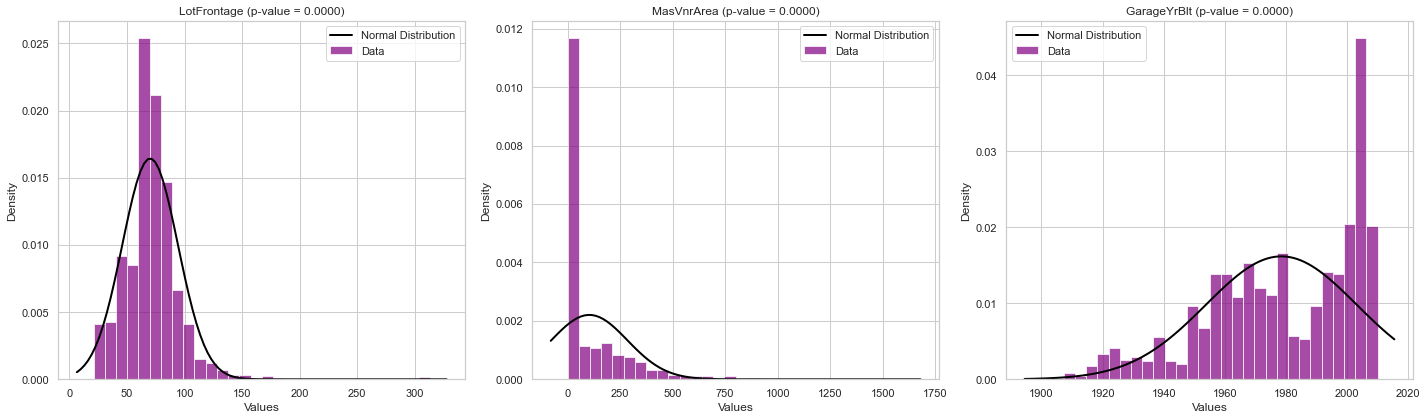

In [174]:
# List of columns with missing data
columns_with_missing = [
    "LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical",
    "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"
]

# Selecting only numerical columns among those with missing data
numeric_values = df_copy[columns_with_missing].select_dtypes(include=[np.number])

# Creating histograms for numerical variables side by side
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_values.columns), figsize=(20, 6))

for i, column in enumerate(numeric_values.columns):
    data = df_copy[column].dropna()
    
    # Checking data distribution (Shapiro-Wilk test)
    _, p_value = shapiro(data)
    
    # Creating histogram for each variable side by side
    axes[i].hist(data, bins=30, color='purple', alpha=0.7, label='Data', density=True)
    
    # Comparison with normal distribution
    mu, std = norm.fit(data)
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, color='black', label='Normal Distribution')
    
    axes[i].set_title(f'{column} (p-value = {p_value:.4f})')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Central Tendency Analysis for Numerical Variables:</span>

<span style="font-size: 16px;">🏡 Central tendency analysis (mean and median) is crucial for numerical variables due to their various distributions.</span>

<span style="font-size: 16px;">🏡 When the data distribution is close to normal, confirmed by a normality test (such as the Shapiro-Wilk test), using the mean as a measure of central tendency is justified.</span>

<span style="font-size: 16px;">🏡 The mean is sensitive to outliers but effectively represents the central tendency of the data, making it useful in data analysis.</span>

<span style="font-size: 16px;">🏡 Conversely, for variables with skewed or non-normal distributions, the median becomes a more reliable measure of central tendency.</span>

<span style="font-size: 16px;">🏡 It is more robust against outliers and better reflects the central tendency of data for such distributions.</span>

<span style="font-size: 16px;">🏡 The following code calculates the mean for the "LotFrontage" column, which exhibits a distribution close to normal, and computes the median for the remaining numerical variables.</span>

<span style="font-size: 16px;">🏡 These operations are performed with the aim of maintaining consistency and accuracy in data analysis.</span>

<span style="font-size: 16px;">🏡 Utilizing appropriate measures of central tendency allows for accurately capturing the central tendency for diverse data distributions, which is crucial during analysis and decision-making processes.</span>

</div>


In [175]:
# Calculate the mean for LotFrontage (close to normal distribution)
mean_LotFrontage = df_copy['LotFrontage'].mean()

# Calculate the medians for the remaining columns
medians = df_copy[columns_with_missing[1:]].median()

medians


C:\Users\weron\AppData\Local\Temp/ipykernel_30724/1866157686.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df_copy[columns_with_missing[1:]].median()


MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Understanding Zero Values in the Column "MasVnrArea" and Determining the Median Garage Year Built:</span>

<span style="font-size: 16px;">🏡 The zero value (0.0) in the column "MasVnrArea" indicates the absence of masonry veneer on the inspected building.</span>

<span style="font-size: 16px;">🏡 This column likely represents the surface area of the masonry veneer on the building in square meters.</span>

<span style="font-size: 16px;">🏡 When the value is zero, it means there is no masonry veneer in that particular case.</span>

<span style="font-size: 16px;">🏡 This understanding stems from the data context and can be useful when making decisions regarding missing data in this column.</span>

<span style="font-size: 16px;">🏡 The median is a measure of central tendency that divides the data into two equal parts, meaning that 50% of garages had a year built before 1980, and 50% had a year built after.</span>

</div>


In [176]:
mean_LotFrontage

70.04995836802665

In [177]:
# We create a copy of the DataFrame and fill in the missing values
df_copy_1 = df_copy.copy()
df_copy_1['LotFrontage'].fillna(mean_LotFrontage, inplace=True)
df_copy_1[columns_with_missing[1:]] = df_copy_1[columns_with_missing[1:]].fillna(medians)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Categorical variables
</div>

In [178]:
# Calculating the number of missing values in each column
null_values = df_copy_1.isnull().sum()

# Calculating the percentage of missing values in each column
null_percentage = (null_values / len(df_copy)) * 100

# Creating a DataFrame with the results
missing_data = pd.DataFrame({'Number of missing values': null_values, 'Percentage of missing values': null_percentage})

# Displaying columns with missing values
columns_with_missing = missing_data[missing_data['Number of missing values'] > 0]
columns_with_missing


Number of missing values  Percentage of missing values
MasVnrType                           8                      0.547945
BsmtQual                            37                      2.534247
BsmtCond                            37                      2.534247
BsmtExposure                        38                      2.602740
BsmtFinType1                        37                      2.534247
BsmtFinType2                        38                      2.602740
Electrical                           1                      0.068493
GarageType                          81                      5.547945
GarageFinish                        81                      5.547945
GarageQual                          81                      5.547945
GarageCond                          81                      5.547945

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Imputation Strategy for Missing Categorical Variables:</span>

<span style="font-size: 16px;">🏡 For categorical variables, the strategy for imputing missing data often relies on using the most frequent category or adding a new category representing missing data.</span>

<span style="font-size: 16px;">🏡 The choice of imputation method for missing values depends on the context and the purpose of the analysis.</span>

<span style="font-size: 16px;">🏡 It is worth considering different approaches for imputing categorical data, taking into account the dataset's specifics and potential impact on analysis and modeling results.</span>

</div>




In [179]:
# Select only object-type columns
object_columns = df_copy_1.select_dtypes(include=['object'])

# Find the most frequent value in each column
most_frequent_values = object_columns.mode().iloc[0]

# Fill missing data with the most frequent values
df_copy_1[object_columns.columns] = df_copy_1[object_columns.columns].fillna(most_frequent_values.to_dict())
most_frequent_values.head()


MSZoning           RL
Street           Pave
LotShape          Reg
LandContour       Lvl
Utilities      AllPub
Name: 0, dtype: object

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.9 Outliers detection

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Outlier Detection - Considerations:</span>

<span style="font-size: 16px;">1. **Correlation:** Check how strongly each of the 78 variables correlates with the target variable. Those with higher correlation may have a greater impact.</span>

<span style="font-size: 16px;">2. **Feature Importance in Models:** While training models, you'll notice which variables are crucial in predicting outcomes.</span>

<span style="font-size: 16px;">3. **Visual Analysis:** Plots such as scatter plots or regression plots will help visualize how variables behave in the context of the target variable.</span>

<span style="font-size: 16px;">4. **Expert Knowledge:** Insights from experts in the field can be invaluable in selecting key variables.</span>

<span style="font-size: 16px;">The choice of method depends on various factors such as dataset size and preferred models. Combining different approaches can provide a comprehensive understanding of the variables' impact on the target variable.</span>

</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Correlation
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Outlier Detection - Correlation:</span>

<span style="font-size: 16px;">🏡 Analyzing the correlation between the variable under investigation (e.g., 'SalePrice') and other features can provide significant insights into their importance for modeling. Correlation value informs us about the strength and direction of the relationship between two variables.</span>

<span style="font-size: 16px;">🏡 Correlation helps understand which features have the greatest impact on the target variable, which is crucial for building predictive models. Strong positive or negative correlation between 'SalePrice' and other variables indicates the significant influence of these features on property prices.</span>

<span style="font-size: 16px;">🏡 Regarding outlier detection, analyzing the correlation between 'SalePrice' and other variables can aid in identifying outliers. High correlation between 'SalePrice' and a particular feature containing outliers may indicate atypical cases. Outliers affecting high correlation between variables may signal that these data points have a significant impact on the model and warrant detailed examination.</span>

</div>





In [180]:

target_variable = 'SalePrice'
numeric_features = df_copy_1.select_dtypes(include=[np.number]).drop(columns=[target_variable])
features = numeric_features.columns.tolist()

# Obliczenie korelacji
correlations = df_copy_1.corr()
correlations_y = correlations[target_variable].sort_values(ascending=False)

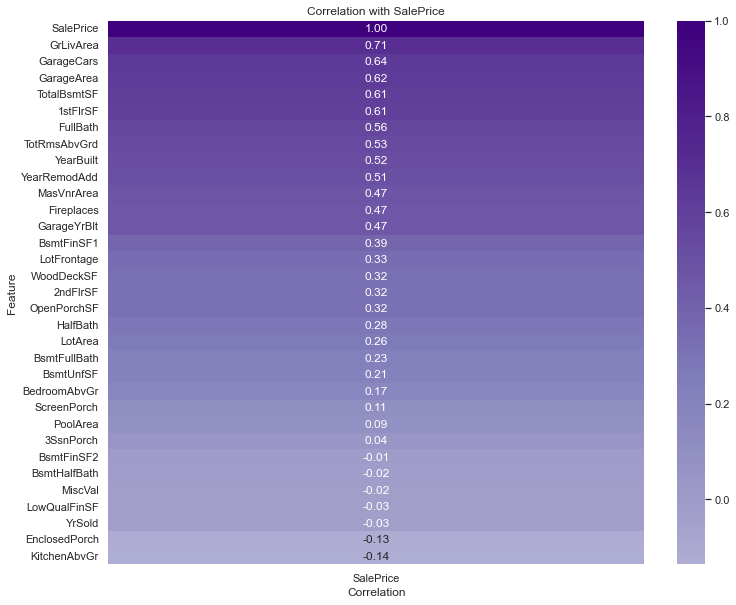

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap of correlation table with purple color gradient
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_y.to_frame(), annot=True, cmap='Purples', fmt='.2f', center=0)
plt.title('Correlation with SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Which variables do we want to focus on?
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: black; font-size: 16px;">🏡 Variables such as OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, and FullBath show stronger correlations with SalePrice as well as greater importance in the RandomForest model.</span>

<span style="color: black; font-size: 16px;">🏡 Examining outliers in all variables can be time-consuming. Focusing on the most significant variables allows for optimizing time and resources, concentrating on areas that have the most impact on the analysis.</span>
  
<span style="color: black; font-size: 16px;">🏡The most important variables have a greater impact on the model. Removing outliers from these variables may have a larger effect on improving the model quality.</span>
  
<span style="color: black; font-size: 16px;">🏡 Outliers in the most important variables can be crucial for analysis. Removing them can improve the interpretability and accuracy of the model.</span>

<span style="color: black; font-size: 16px;">🏡 However, focusing solely on the most important variables may overlook significant aspects of other variables, which may also contain important information for the analysis. Outliers in less significant variables may also be crucial for data analysis, so it's worthwhile to maintain flexibility and consider examining outliers in all variables if possible.</span>
</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## OverallQual
</div>

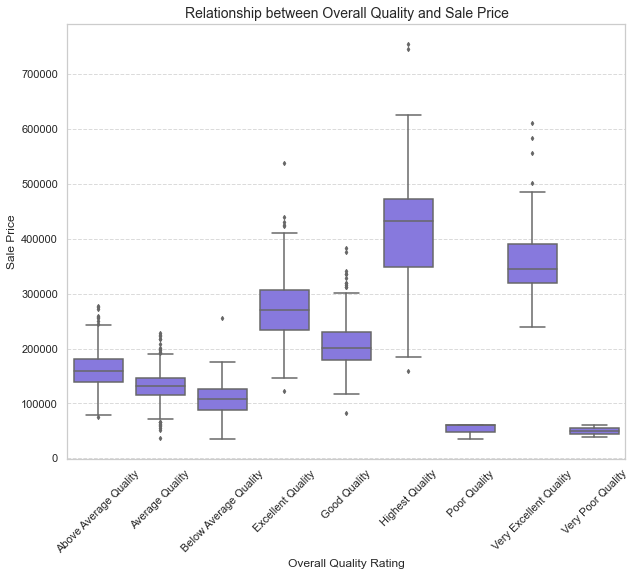

In [182]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid", palette=sns.color_palette("Purples_r", 10))  # Reversing the Purples palette and using 10 shades
sns.boxplot(x='OverallQual', y='SalePrice', data=df_copy_1, linewidth=1.5, fliersize=3, color='mediumslateblue')  # Using the color mediumslateblue
plt.xlabel('Overall Quality Rating', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.title('Relationship between Overall Quality and Sale Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Outlier Analysis for Variable "OverallQual":</span>

<span style="font-size: 16px;">🏡The variable "OverallQual"  is a variable assessing the quality of the house on a scale from very poor to very good, considering various construction and finishing features.</span>

<span style="font-size: 16px;"> 🏡The overall quality of a building is one of the main factors affecting property prices. Higher quality often translates to higher market value, so it's worth examining how outliers in "OverallQual" may affect the sale price.</span>

</div>


In [183]:
# Statistics
statistics = df_copy_1.groupby('OverallQual')['SalePrice'].describe()
print(statistics)


                        count           mean            std       min  \
OverallQual                                                             
Above Average Quality   374.0  161603.034759   36090.182933   76000.0   
Average Quality         417.0  131314.733813   28712.010919   37900.0   
Below Average Quality   116.0  108420.655172   29022.003886   34900.0   
Excellent Quality       168.0  274735.535714   63898.902253  122000.0   
Good Quality            319.0  207716.423197   44466.259414   82500.0   
Highest Quality          18.0  438588.388889  159785.491058  160000.0   
Poor Quality              3.0   51770.333333   14254.200796   35311.0   
Very Excellent Quality   43.0  367513.023256   81278.174849  239000.0   
Very Poor Quality         2.0   50150.000000   15344.217152   39300.0   

                             25%       50%       75%       max  
OverallQual                                                     
Above Average Quality   139125.0  160000.0  181000.0  277000.0  
A

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Outliars for 4 and 8 quality
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Property Quality Analysis in Relation to Sale Prices:</span>

<span style="font-size: 16px;">Cheatsheet:</span>
<ul>
    <li><b>1:</b> 'Very Poor Quality'</li>
    <li><b>2:</b> 'Poor Quality'</li>
    <li><b>3:</b> 'Average Quality'</li>
    <li><b>4:</b> 'Below Average Quality'</li>
    <li><b>5:</b> 'Average Quality'</li>
    <li><b>6:</b> 'Average to Above Average Quality'</li>
    <li><b>7:</b> 'Very Good Quality'</li>
    <li><b>8:</b> 'Excellent Quality'</li>
    <li><b>9:</b> 'Very Excellent Quality'</li>
    <li><b>10:</b> 'Highest Quality'</li>
</ul>

<span style="font-size: 16px;">Boxplot analysis for property quality (Overall Quality) in relation to sale prices (SalePrice) reveals:</span>

<ul>
    <li><span style="font-size: 16px;"><b>Price Differences:</b> Average price values increase with higher property quality.</span></li>
    <li><span style="font-size: 16px;"><b>Outliers and their Impact:</b> For quality classes 4, 5, and 6, there are slightly higher maximum values, while for quality classes 9 and 10, maximum values significantly exceed the 75th percentile for prices in these classes.</span></li>
    <li><span style="font-size: 16px;"><b>Outliers:</b> There are outliers that exceed the price range for specific quality classes. For quality rated at 4 and 8, outliers occur, reaching approximately 250 thousand and 520 thousand, respectively.</span></li>
</ul>

<span style="font-size: 16px;">Analyzing the boxplot and statistics, it can be observed that property quality significantly influences their sale prices. However, outliers in specific quality classes may indicate specific factors or features affecting prices in those particular cases.</span>

</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Outliers for 9 and 10 quality
</div>

<div style="background-color: #f4f4f4; padding: 10px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Outlier Identification Method Using Standard Deviation:</span>

<span style="font-size: 16px;">🏡This method relies on applying the standard deviation rule as a criterion for detecting outliers. Values that significantly deviate from the mean, thus exceeding two times the standard deviation, are considered outliers and displayed.</span>

<span style="font-size: 16px;">🏡It is a quick way to identify potential outliers based on the distance from the mean of a given group. However, this method can be sensitive to extreme or outlier data, which may lead to the removal of values that are not actual outliers but merely more extreme data points. It is recommended to always analyze the context and characteristics of the data before removing outliers.</span>

</div>




In [184]:
# Selecting data for OverallQual = 9 and 10
data_qual_9 = df_copy_1[df_copy_1['OverallQual'] == 'Bardzo doskonała jakość']['SalePrice']
data_qual_10 = df_copy_1[df_copy_1['OverallQual'] == 'Najwyższa jakość']['SalePrice']

# Calculating mean and standard deviation
mean_qual_9 = np.mean(data_qual_9)
std_dev_qual_9 = np.std(data_qual_9)
mean_qual_10 = np.mean(data_qual_10)
std_dev_qual_10 = np.std(data_qual_10)

# Detecting outliers
outliers_qual_9 = data_qual_9[data_qual_9 > mean_qual_9 + 2 * std_dev_qual_9]
outliers_qual_10 = data_qual_10[data_qual_10 > mean_qual_10 + 2 * std_dev_qual_10]

# Displaying outliers
print("\033[95mOutliers for OverallQual = 9:")
print(outliers_qual_9)

print("\nOutliers for OverallQual = 10:")
print(outliers_qual_10)


Outliers for OverallQual = 9:
Series([], Name: SalePrice, dtype: int64)

Outliers for OverallQual = 10:
Series([], Name: SalePrice, dtype: int64)


In [185]:
# Copying data
df_copy_2 = df_copy_1.copy()

# Finding indices of outliers for OverallQual = 9 and 10
outlier_indices_qual_9 = data_qual_9[data_qual_9 > mean_qual_9 + 2 * std_dev_qual_9].index
outlier_indices_qual_10 = data_qual_10[data_qual_10 > mean_qual_10 + 2 * std_dev_qual_10].index

# Removing outliers from df_copy_2
df_copy_2.drop(outlier_indices_qual_9, inplace=True)
df_copy_2.drop(outlier_indices_qual_10, inplace=True)



In [186]:
# Selecting data for OverallQual = 'Below Average Quality' and price > 200,000
outliers_qual_4_high_price = df_copy_1[(df_copy_1['OverallQual'] == 'Below Average Quality') & (df_copy_1['SalePrice'] > 200000)]
print(outliers_qual_4_high_price)


                     MSSubClass MSZoning  LotFrontage  LotArea Street  \
457  One-story residential home       RL    70.049958    53227   Pave   

    LotShape LandContour Utilities LotConfig LandSlope  ... ScreenPorch  \
457      IR1         Low    AllPub   CulDSac       Mod  ...           0   

    PoolArea   PoolQC Fence MiscVal MoSold YrSold  SaleType  SaleCondition  \
457        0  No Pool  None       0  March   2008        WD         Normal   

    SalePrice  
457    256000  

[1 rows x 78 columns]


In [187]:
outliers_qual_4_high_price[['OverallQual', 'SalePrice']]


OverallQual  SalePrice
457  Below Average Quality     256000

In [188]:
# Finding the indices of outliers
outlier_indices_qual_4 = outliers_qual_4_high_price.index

# Removing outliers from the data
df_copy_2.drop(outlier_indices_qual_4, inplace=True)



In [189]:
outliers_qual_8_high_price = df_copy_1[(df_copy_1['OverallQual'] == 'Excellent Quality') & (df_copy_1['SalePrice'] > 500000)]
print(outliers_qual_8_high_price)


                     MSSubClass MSZoning  LotFrontage  LotArea Street  \
769  Two-story residential home       RL         47.0    53504   Pave   

    LotShape LandContour Utilities LotConfig LandSlope  ... ScreenPorch  \
769      IR2         HLS    AllPub   CulDSac       Mod  ...         210   

    PoolArea   PoolQC Fence MiscVal MoSold YrSold  SaleType  SaleCondition  \
769        0  No Pool  None       0   June   2010        WD         Normal   

    SalePrice  
769    538000  

[1 rows x 78 columns]


In [190]:
outliers_qual_8_high_price[['OverallQual', 'SalePrice']]

OverallQual  SalePrice
769  Excellent Quality     538000

In [191]:
# Finding indices of outliers
outlier_indices_qual_8 = outliers_qual_8_high_price.index

# Removing outliers from the data
df_copy_2.drop(outlier_indices_qual_8, inplace=True)


In [192]:
df_copy_2.shape

(1458, 78)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## GrLivArea
</div>

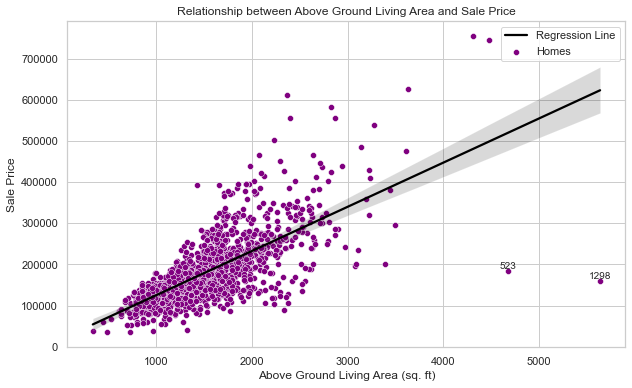

In [193]:
# Creating a scatter plot with points and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='purple', label='Homes')
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter=False, color='black', label='Regression Line')

# Adding labels to outliers
outliers = df_copy_2[df_copy_2['GrLivArea'] > 4500]  # Selecting outliers
for i, row in outliers.iterrows():
    plt.text(row['GrLivArea'], row['SalePrice'], str(i), ha='center', va='bottom', fontsize=10)

plt.xlabel('Above Ground Living Area (sq. ft)')
plt.ylabel('Sale Price')
plt.title('Relationship between Above Ground Living Area and Sale Price')

plt.legend()
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Removal of GrLivArea Values Above 4000:</span>

<span style="font-size: 16px;">🏡 Removing GrLivArea values above 4000 is justified due to their significant distance from typical values of this attribute. Leaving these values could lead to errors in data analysis and result in inaccurate predictive models.</span>

<span style="font-size: 16px;"> 🏡Removing these outliers helps maintain data consistency and improves the quality of analysis and predictive models.</span>

</div>



In [194]:
# Usuń domy z powierzchnią większą niż 4000 stóp kwadratowych
df_copy_3 = df_copy_2[df_copy_2['GrLivArea'] <= 4000]

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## GarageCars
</div>

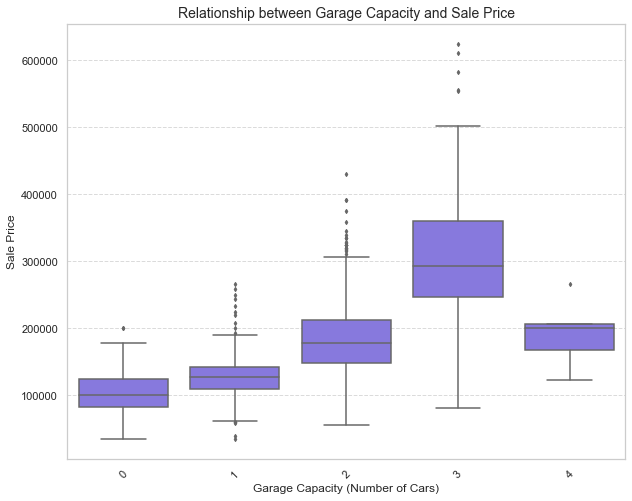

In [195]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid", palette=sns.color_palette("Purples_r", 10))  # Reversing the Purples palette and using 10 shades
sns.boxplot(x='GarageCars', y='SalePrice', data=df_copy_3, linewidth=1.5, fliersize=3, color='mediumslateblue')  # Using the color mediumslateblue
plt.xlabel('Garage Capacity (Number of Cars)', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.title('Relationship between Garage Capacity and Sale Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




In [196]:

# Calculation of mean and standard deviation
mean = df_copy_3['GarageCars'].mean()
std_dev = df_copy_3['GarageCars'].std()

# Defining the standard deviation boundaries
# You can adjust the coefficient value based on your needs
# For example, 3 means values that are 3 standard deviations away
threshold = 3

# Calculation of outlier boundaries
lower_threshold = mean - (threshold * std_dev)
upper_threshold = mean + (threshold  * std_dev)

# Finding outliers
outliers = df_copy_3[(df_copy_3['GarageCars'] < lower_threshold) | (df_copy_3['GarageCars'] > upper_threshold)]
outliers


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Standard Deviation Analysis for the Variable "GarageCars":</span>

<span style="font-size: 16px;">🏡The standard deviation analysis concerning the garage capacity data (GarageCars) revealed that no values fall outside the boundaries defined as potential outliers.</span>

<span style="font-size: 16px;">🏡The absence of observations exceeding the established limits suggests that all values within this range conform to the expected distribution of garage capacity data.</span>

</div>



In [197]:
# Calculate quantiles for sale price based on the number of garage cars
quantiles = df_copy_3.groupby('GarageCars')['SalePrice'].quantile([0.25, 0.5, 0.75]).unstack()

# Adding a column with the number of observations for each GarageCars value
counts = df_copy_3['GarageCars'].value_counts().sort_index()
quantiles['Counts'] = counts

# Display the results
print(quantiles)



                0.25       0.5      0.75  Counts
GarageCars                                      
0            82500.0  100000.0  124000.0      81
1           110000.0  128000.0  142000.0     369
2           148000.0  177750.0  213000.0     822
3           246578.0  293077.0  360000.0     177
4           168000.0  200000.0  206300.0       5


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Observations</span>


<span style="font-size: 16px;">🏡The group for GarageCars equal to 4 seems to have a low number of observations (only 5), which may render these results unrepresentative for the entire dataset. Additionally, looking at the sales values for this group, they are relatively low, suggesting potential deviations from the norm.</span>

<span style="font-size: 16px;">🏡Therefore, we are considering removing this group as the number of observations is low, and the prices are quite low, indicating potential outliers.</span>

</div>


In [198]:
# Drop values for GarageCars = 4
df_filtered = df_copy_3[df_copy_3['GarageCars'] != 4]


In [199]:
df_filtered.shape

(1449, 78)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## TotalBsmtSF
</div>

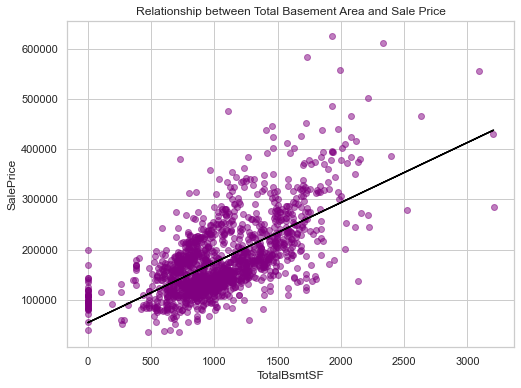

In [200]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['TotalBsmtSF'], df_filtered['SalePrice'], color='purple', alpha=0.5)

# Fitting a line to the data
fit = np.polyfit(df_filtered['TotalBsmtSF'], df_filtered['SalePrice'], 1)
fit_fn = np.poly1d(fit)

# Adding a trend line
plt.plot(df_filtered['TotalBsmtSF'], fit_fn(df_filtered['TotalBsmtSF']), color='black')

plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Relationship between Total Basement Area and Sale Price')

plt.show()



In [201]:
# Determining the boundaries for outliers based on standard deviation
mean = df_filtered['TotalBsmtSF'].mean()
std_dev = df_filtered['TotalBsmtSF'].std()
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Finding the outliers
outliers = df_filtered[(df_filtered['TotalBsmtSF'] < lower_bound) | (df_filtered['TotalBsmtSF'] > upper_bound)]

# Displaying the outliers
print(outliers)


                      MSSubClass MSZoning  LotFrontage  LotArea Street  \
224   One-story residential home       RL   103.000000    13472   Pave   
332   One-story residential home       RL    85.000000    10655   Pave   
440   One-story residential home       RL   105.000000    15431   Pave   
496   One-story residential home       RL    70.049958    12692   Pave   
898   One-story residential home       RL   100.000000    12919   Pave   
1044  One-story residential home       RL    80.000000     9600   Pave   
1373  One-story residential home       RL    70.049958    11400   Pave   

     LotShape LandContour Utilities LotConfig LandSlope  ... ScreenPorch  \
224       Reg         Lvl    AllPub    Inside       Gtl  ...           0   
332       IR1         Lvl    AllPub    Inside       Gtl  ...           0   
440       Reg         Lvl    AllPub    Inside       Gtl  ...         170   
496       IR1         Lvl    AllPub    Inside       Gtl  ...           0   
898       IR1         Lvl  

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Choosing the Standard Deviation Rule:</span>

<span style="font-size: 16px;">🏡 In the case of the three standard deviations rule, this area covers a wider range of data compared to two deviations, which sometimes leads to including a greater number of observations as potential outliers. In this specific case



In [202]:
outliers_filtered = outliers[['TotalBsmtSF', 'SalePrice']]
print(outliers_filtered)

      TotalBsmtSF  SalePrice
224          2392     386250
332          3206     284000
440          3094     555000
496          3200     430000
898          2330     611657
1044         2524     278000
1373         2633     466500


In [203]:
# Indexes of outlier values
outliers_indexes = outliers.index

# Removing outlier values from df_filtered
df_filtered_1 = df_filtered.drop(outliers_indexes)
print(df_filtered_1.shape)


(1442, 78)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1stFlrSF
</div>

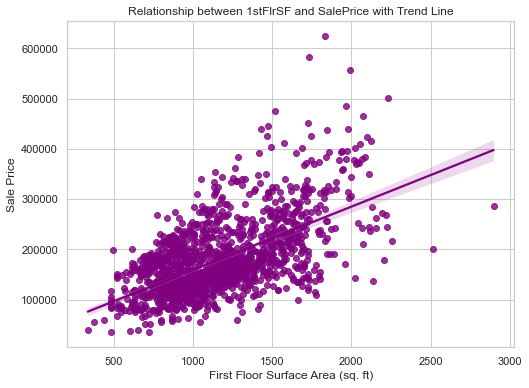

In [204]:
# Plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='1stFlrSF', y='SalePrice', data=df_filtered_1, color='purple')
plt.title('Relationship between 1stFlrSF and SalePrice with Trend Line')
plt.xlabel('First Floor Surface Area (sq. ft)')
plt.ylabel('Sale Price')

plt.show()




In [205]:
# Determining bounds for outliers based on standard deviation
mean_1stFlrSF = df_filtered_1['1stFlrSF'].mean()
std_dev_1stFlrSF = df_filtered_1['1stFlrSF'].std()
lower_bound_1stFlrSF = mean_1stFlrSF - 3 * std_dev_1stFlrSF
upper_bound_1stFlrSF = mean_1stFlrSF + 3 * std_dev_1stFlrSF

# Finding outliers
outliers_1stFlrSF = df_filtered_1[(df_filtered_1['1stFlrSF'] < lower_bound_1stFlrSF) | (df_filtered_1['1stFlrSF'] > upper_bound_1stFlrSF)]

# Displaying outliers
print(outliers_1stFlrSF[['1stFlrSF', 'SalePrice']])


      1stFlrSF  SalePrice
70        2223     244000
113       2259     217000
178       2234     501837
529       2515     200624
1024      2898     287000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Analysis of Outliers for First Floor Surface Area:</span>

<span style="font-size: 16px;">🏡Looking at the outliers in the '1stFlrSF' and 'SalePrice' columns, we set bounds based on standard deviation.</span>

<span style="font-size: 16px;">🏡However, the removal of these five observations is based on the fact that they are significantly distant from the average value. Nonetheless, this does not necessarily mean they are incorrect or invalid.</span>

<span style="font-size: 16px;">🏡Before deciding to remove them, it's worth considering whether these data have significant relevance for the analysis. The number of these observations is relatively small compared to the entirety of the data. Removing them may affect the representativeness of the analysis. Therefore, it's important to understand whether these outliers make sense in the context of the problem being studied, as well as whether their removal would distort the analysis. A broader context analysis is necessary to make a more informed decision on this matter.</span>

</div>



In [206]:
# Indexes of the outliers
outliers_indexes = outliers_1stFlrSF.index

# Removing the outliers from df_filtered
df_filtered_2 = df_filtered_1.drop(outliers_indexes)
df_filtered_2.shape


(1437, 78)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Full Bath
</div>

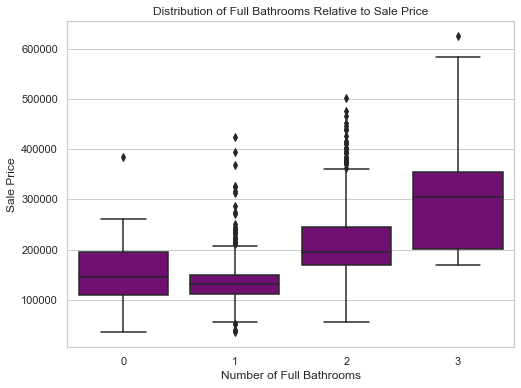

In [207]:
# Setting seaborn style for the plot
sns.set(style="whitegrid")

# Creating a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=df_filtered_1, color='purple')

plt.title('Distribution of Full Bathrooms Relative to Sale Price')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price')

plt.show()



In [208]:
# Determining outlier boundaries based on standard deviation
mean_full_bath = df_filtered_2['FullBath'].mean()
std_dev_full_bath = df_filtered_2['FullBath'].std()
lower_bound_full_bath = mean_full_bath - 3 * std_dev_full_bath
upper_bound_full_bath = mean_full_bath + 3 * std_dev_full_bath

# Finding outlier values
outliers_full_bath = df_filtered_2[(df_filtered_2['FullBath'] < lower_bound_full_bath) | 
                                   (df_filtered_2['FullBath'] > upper_bound_full_bath)]

# Displaying outlier values
print(outliers_full_bath)



Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">✨ Analysis of Number of Bathrooms on Ground Level (FullBath):</span>

<span style="font-size: 16px;">🏡I have chosen not to remove outliers associated with this variable because there are situations where the price may be high despite the lack of a bathroom on this level. This could be due to other factors such as the age of the building or other unique features that affect the price.</span>

<span style="font-size: 16px;">🏡For most cases of bathroom counts, there are no significant discrepancies observed. Although using the 2 standard deviations rule would identify around 30 outliers, at this stage, I choose to keep these values in the dataset. It is difficult to determine the price solely based on the number of bathrooms, so in this context, I prefer to retain these values in the dataset.</span>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.10 Skew features
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Skewness - Analysis of Data Distribution Asymmetry:</span>

<span style="font-size: 16px;">🏡Skewness is a measure of the asymmetry of the data distribution. A distribution is considered symmetric when the skewness is 0. However, when skewness is positive, it indicates that the distribution is shifted towards the right, suggesting that there are more observations on the left side of the distribution's center. Conversely, negative skewness indicates a shift to the left.</span>

<span style="font-size: 16px;">Issues related to data skewness:</span>

1. <span style="font-size: 16px;">**🏡Impact on mean and median:** In the case of skewed data, the mean may be shifted towards the tail of the distribution, making it not the best measure of central tendency. The median may better reflect the central position of the data in the presence of skewness.</span>

2. <span style="font-size: 16px;">**🏡Impact on statistical tests:** Some statistical tests, especially parametric ones, assume normality of data. Skewness can affect the results of these tests, especially if symmetrical distribution is assumed.</span>

3. <span style="font-size: 16px;">**🏡Impact on predictive models:** Predictive models, particularly regression-based ones, may perform better with data that are more symmetrical. Skewness can affect the accuracy of predictions, so skewness correction may be important in the context of modeling.</span>

</div>




In [209]:
from scipy.stats import skew

# Assuming df_filtered_2 is a DataFrame containing all the data
##numeric_feats = df_filtered_2.dtypes[df_filtered_2.dtypes != "object"].index

numeric_feats = df_filtered_2.select_dtypes(include=['int64', 'float64']).columns

# Calculating skewness for each numerical variable
skewed_feats = df_filtered_2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Creating a DataFrame with the results
skewness = pd.DataFrame({'Skew': skewed_feats})

# Displaying the top 10 variables with the highest skewness
print("\nSkew in numerical features: \n")
print(skewness.head(10))




Skew in numerical features: 

                    Skew
MiscVal        24.258588
PoolArea       17.388846
LotArea        13.075838
3SsnPorch      10.210151
LowQualFinSF    8.928292
KitchenAbvGr    4.566042
BsmtFinSF2      4.318287
ScreenPorch     4.134211
BsmtHalfBath    4.125649
EnclosedPorch   3.092714


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## How to deal with skewness?
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Dealing with Data Skewness Methods:</span>

<span style="font-size: 16px;">In data analysis, skewness can introduce distortions, so there are several popular methods to deal with it:</span>

1. <span style="font-size: 16px;">**Log Transformation:**</span> Skewed data can be transformed using logarithm, which is effective for power-law distributions.

2. <span style="font-size: 16px;">**Box-Cox Transformation:**</span> A more general method to minimize skewness, with the ability to automatically adjust the lambda value. Especially useful when data contain zero or negative values.

3. <span style="font-size: 16px;">**Outlier Removal:**</span> Sometimes outliers can contribute to skewness, removing them may help improve the data distribution.

4. <span style="font-size: 16px;">**Power Transformation:**</span> Transforming data using square root or power to reduce skewness.

5. <span style="font-size: 16px;">**Using Special Models:**</span> Using models resistant to outliers, such as median-based models.

<span style="font-size: 16px;">Most General Method:</span>

<span style="font-size: 16px;">There is no one-size-fits-all method as the choice depends on the data characteristics. However, the Box-Cox transformation is widely used due to its flexibility and ability to automatically adjust parameters, making it an attractive choice in many cases.</span>

</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Transformation Box Cox
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Box-Cox Transformation:</span>

<span style="font-size: 16px;">The Box-Cox transformation is a technique for transforming data with the aim of achieving a distribution close to normal. This is particularly useful when data exhibit skewness, meaning they are shifted in one direction, making it impossible to achieve a symmetrical distribution.</span>

<span style="font-size: 16px;">Key steps of the Box-Cox transformation:</span>

1. <span style="font-size: 16px;">**Choosing the Lambda Parameter (λ):** The lambda value determines the degree of transformation. In the case of Box-Cox, the lambda value is adjusted to achieve the most symmetrical distribution.</span>

2. <span style="font-size: 16px;">**Data Transformation:** Data are transformed according to the formula:
</span>

<span style="font-size: 16px;">Advantages of Box-Cox Transformation:</span>

1. <span style="font-size: 16px;">**Skewness Elimination:** The Box-Cox transformation has the ability to eliminate skewness in data, contributing to achieving a more symmetrical distribution.</span>

2. <span style="font-size: 16px;">**Automatic Adjustment:** The lambda value is automatically adjusted, facilitating the transformation process and allowing for optimal results.</span>

3. <span style="font-size: 16px;">**Applicability to Various Data:** The Box-Cox transformation can be applied to different types of data, both positive and negative.</span>

4. <span style="font-size: 16px;">**Achieving Normal Distribution:** The main goal of the transformation is to achieve a distribution close to normal, which is beneficial for many statistical analyses and data modeling.</span>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Lambda parameter optimisation
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Optimization of Box-Cox Transformation:</span>

<span style="font-size: 16px;">🏡The Box-Cox transformation is a powerful tool in data analysis, helping to achieve a more normal distribution of numerical variables. The following code aims to find the optimal value of the lambda parameter (λ) for each variable, minimizing the skewness of the data after transformation.</span>

<span style="font-size: 16px;">Main steps of the code:</span>

<span style="font-size: 16px;">🏡Variable selection: It selects only numerical variables from the dataframe df_filtered_2.</span>

<span style="font-size: 16px;">🏡Data preparation: It prepares the data for transformation by selecting the appropriate columns.</span>

<span style="font-size: 16px;">🏡Definition of lambda range: The range of lambda values is defined to test different transformations.</span>

<span style="font-size: 16px;">🏡Iteration over variables: For each numerical variable, the code iterates over the range of lambda values, applying the Box-Cox transformation and searching for the optimal lambda value.</span>

<span style="font-size: 16px;">🏡Saving the best lambda: For each variable, it saves the best lambda value that minimizes the skewness after transformation.</span>

<span style="font-size: 16px;">🏡Printing the best lambda: The final result is the printout of the best lambda values for each variable, allowing for optimal adjustment of the Box-Cox transformation.</span>

</div>






In [210]:

from scipy.stats import skew, boxcox

from ipywidgets import interact, widgets, Layout

# Wybierz tylko zmienne numeryczne
numeric_feats = df_filtered_2.select_dtypes(include=['int64', 'float64']).columns

# Przygotuj dane
data_to_transform = df_filtered_2[numeric_feats]

# Zdefiniuj zakres wartości lambda do przetestowania
lambda_range = np.linspace(-2, 2, 100)

# Inicjalizuj słownik do przechowywania najlepszych wartości lambda dla każdej zmiennej
best_lambdas = {}

# Iteruj po każdej zmiennej numerycznej
for feature in numeric_feats:
    best_skewness = float('inf')
    best_lambda = None
    
    # Iteruj po zakresie wartości lambda
    for lmbda in lambda_range:
        # Zastosuj transformację Box-Cox do danej wartości lambda
        transformed_feature = boxcox(data_to_transform[feature] + 1, lmbda=lmbda)
        
        # Oblicz skośność dla przekształconej zmiennej
        current_skewness = skew(transformed_feature)
        
        # Sprawdź, czy uzyskano lepszą skośność
        if abs(current_skewness) < abs(best_skewness):
            best_skewness = current_skewness
            best_lambda = lmbda
    
    # Zapisz najlepszą wartość lambda dla danej zmiennej
    best_lambdas[feature] = best_lambda

# Funkcja do wyświetlania informacji o najlepszej wartości lambda po zmianie wyboru w liście rozwijanej
def show_best_lambda(feature):
    best_lambda = best_lambdas[feature]
    print(f"Najlepsza wartość lambda dla zmiennej {feature}: {best_lambda}")

# Tworzenie rozwijanej listy
dropdown_list = widgets.Dropdown(options=numeric_feats, value=numeric_feats[0], description='Wybierz zmienną:')

# Połączenie funkcji z rozwijaną listą
interactive_plot = interact(show_best_lambda, feature=dropdown_list)

# Wyświetlenie rozwijanej listy
interactive_plot


interactive(children=(Dropdown(description='Wybierz zmienną:', options=('LotFrontage', 'LotArea', 'YearBuilt',…

<function __main__.show_best_lambda(feature)>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Sama transformacja Box Cox
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Box-Cox Transformation Optimization:</span>

<span style="font-size: 16px;">Main steps of the code:</span>

<span style="font-size: 16px;">🏡Initialization of DataFrame: It creates a new DataFrame (transformed_data) to store the transformed data.</span>

<span style="font-size: 16px;">🏡Iteration over Numerical Variables: For each numerical variable, it retrieves the best lambda value.</span>

<span style="font-size: 16px;">🏡Application of Box-Cox Transformation: It applies the Box-Cox transformation using the best lambda value for each variable.</span>

<span style="font-size: 16px;">🏡Adding Transformed Variable to DataFrame: It adds the transformed variable to the new DataFrame.</span>

<span style="font-size: 16px;">🏡Calculation of Skewness after Transformation: It calculates the skewness for each variable after the transformation.</span>

<span style="font-size: 16px;">🏡Printing Results: It prints the skewness after transformation for all numerical variables.</span>

</div>


In [212]:
# Initialize a DataFrame to store transformed data
transformed_data = pd.DataFrame()

# Iterate over each numerical feature
for feature in numeric_feats:
    # Get the best lambda value for the given feature
    best_lambda = best_lambdas[feature]
    
    # Apply Box-Cox transformation to the given feature with the best lambda value
    transformed_feature = boxcox(data_to_transform[feature] + 1, lmbda=best_lambda)
    
    # Add the transformed feature to the DataFrame
    transformed_data[feature] = transformed_feature

# Check skewness after transformation
skewness_after_transformation = transformed_data.apply(lambda x: skew(x.dropna()))

# Print the results
print("\nSkewness after Box-Cox transformation:")
print(skewness_after_transformation)




Skewness after Box-Cox transformation:
LotFrontage       0.020021
LotArea           0.101435
YearBuilt        -0.569703
YearRemodAdd     -0.489202
MasVnrArea        0.405623
BsmtFinSF1       -0.000039
BsmtFinSF2        2.438010
BsmtUnfSF         0.047074
TotalBsmtSF      -0.044522
1stFlrSF         -0.013070
2ndFlrSF          0.265353
LowQualFinSF      7.231021
GrLivArea         0.005829
BsmtFullBath      0.383040
BsmtHalfBath      3.882150
FullBath          0.003115
HalfBath          0.525927
BedroomAbvGr      0.022193
KitchenAbvGr      0.010118
TotRmsAbvGrd     -0.012391
Fireplaces        0.001278
GarageYrBlt      -0.651004
GarageCars        0.001769
GarageArea       -0.045393
WoodDeckSF        0.093352
OpenPorchSF      -0.001932
EnclosedPorch     2.059933
3SsnPorch         7.542679
ScreenPorch       3.113106
PoolArea         16.864267
MiscVal           4.967108
YrSold            0.094746
SalePrice        -0.022022
dtype: float64


In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

# Select numerical features for analysis
selected_features = ['MiscVal', 'LotArea', 'BsmtFinSF2', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr']

# Function to draw histograms before and after transformation for the selected feature
def draw_histograms(feature):
    # Initialize plotting objects for histograms before and after transformation
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    colors = sns.color_palette("husl")

    # Draw histogram before transformation
    sns.histplot(df_filtered_2[feature], kde=True, color=colors[0], ax=axes[0])
    axes[0].set_title(f'Pre-transformation Histogram ({feature})')

    # Draw histogram after transformation
    sns.histplot(transformed_data[feature], kde=True, color=colors[1], ax=axes[1])
    axes[1].set_title(f'Post-transformation Histogram ({feature})')

    # Adjust layout
    plt.tight_layout()

    # Display plots
    plt.show()

# Use ipywidgets to interactively select the feature and call the function
interact(draw_histograms, feature=selected_features)


interactive(children=(Dropdown(description='feature', options=('MiscVal', 'LotArea', 'BsmtFinSF2', '3SsnPorch'…

<function __main__.draw_histograms(feature)>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Box-Cox Transformation Optimization:</span>

    🏡Initialization of DataFrame: It creates a new DataFrame (transformed_data) to store the transformed data.

    🏡Iteration over Numerical Variables: For each numerical variable, it retrieves the best lambda value.

    🏡Application of Box-Cox Transformation: It applies the Box-Cox transformation using the best lambda value for each variable.

    🏡Adding Transformed Variable to DataFrame: It adds the transformed variable to the new DataFrame.

    🏡Calculation of Skewness after Transformation: It calculates the skewness for each variable after the transformation.

    🏡Printing Results: It prints the skewness after transformation for all numerical variables.
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 3.Feature engineeering
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Feature Engineering:</span>

🏡 Improving Model Performance:Creating new features can help improve the performance of a model by providing additional information that may be relevant to the decision-making process. Improving the quality of features can lead to better predictions and more accurate results.

    
🏡 Reducing Complexity:By properly designing features, the number of data dimensions or their complexity can be reduced, which facilitates model interpretation and reduces the risk of overfitting.

    
 🏡Information Extraction:Feature engineering can help extract meaningful information from data that may be hidden or difficult to extract in its original form. For example, from date data, various components such as day of the week, month, or season can be extracted, which may be useful in seasonal analysis.

🏡Adaptation to Models:Feature engineering allows data to be tailored to the requirements of specific predictive models. For example, some algorithms may perform better with numerical data than categorical data, so converting categorical variables to numerical ones may be beneficial.
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### "TotalFS"
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Total House Area:</span>

🏠 By combining the areas of different parts of the house, we can obtain a more comprehensive picture of the total living space, which may be important for potential buyers or decision-makers.

🏠 Model Simplification: Instead of analyzing each part of the house separately, we can use a single feature "TotalSF", which can simplify the model and help avoid data redundancy.

</div>

In [214]:
# feture engineering a new feature "TotalFS"
df_filtered_2['TotalSF'] = (df_filtered_2['TotalBsmtSF'] 
                       + df_filtered_2['1stFlrSF'] 
                       + df_filtered_2['2ndFlrSF'])


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### "Total_sqr_footage"
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Total House Area:</span>

🏠 Enhancing Information: By adding a new feature "Total_sqr_footage", which is the sum of the areas of different parts of the house, we obtain a more complete picture of the total living space, which may be significant for analysis and valuation of the property.

</div>


In [215]:

df_filtered_2['Total_sqr_footage'] = (df_filtered_2['BsmtFinSF1'] 
                                 + df_filtered_2['BsmtFinSF2'] 
                                 + df_filtered_2['1stFlrSF'] 
                                 + df_filtered_2['2ndFlrSF']
                                )

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### "Total_Bathrooms"
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Total Bathroom Area:</span>

 🚿 Enhancing Information: By creating a new feature "Total_Bathrooms", which sums up the number of full bathrooms, half bathrooms, and basement bathrooms, we can obtain a comprehensive picture of the number of bathrooms in the house. This is significant from the standpoint of assessing convenience and property value.

</div>


In [216]:
df_filtered_2['Total_Bathrooms'] = (df_filtered_2['FullBath'] 
                               + (0.5 * df_filtered_2['HalfBath']) 
                               + df_filtered_2['BsmtFullBath'] 
                               + (0.5 * df_filtered_2['BsmtHalfBath'])
                              )['Total_Bathrooms'] = (df_filtered_2['FullBath'] 
                               + (0.5 * df_filtered_2['HalfBath']) 
                               + df_filtered_2['BsmtFullBath'] 
                               + (0.5 * df_filtered_2['BsmtHalfBath'])
                              )

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### "Total_Porch"
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Total Porch Area:</span>

🏡 Enhancing Information: By creating a new feature "Total_porch_sf", which sums up the area of various types of porches (open, enclosed, screened, wraparound) and deck areas, we can obtain a more comprehensive picture of the total porch and deck area of the house. This is significant from the standpoint of assessing recreational space and living comfort, which can affect the property's attractiveness to potential buyers.

</div>


In [217]:


                                 



df_filtered_2['Total_porch_sf'] = (df_filtered_2['OpenPorchSF'] 
                              + df_filtered_2['3SsnPorch'] 
                              + df_filtered_2['EnclosedPorch'] 
                              + df_filtered_2['ScreenPorch'] 
                              + df_filtered_2['WoodDeckSF']
                             )

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### "Neighborhood"variable modification
</div>

In [218]:
# Calculate the median sale prices for each neighborhood
neighborhood_medians = df_filtered_2.groupby('Neighborhood')['SalePrice'].median().reset_index()

# Sort the results by the median sale prices (from highest to lowest)
neighborhood_medians_sorted = neighborhood_medians.sort_values(by='SalePrice', ascending=False)



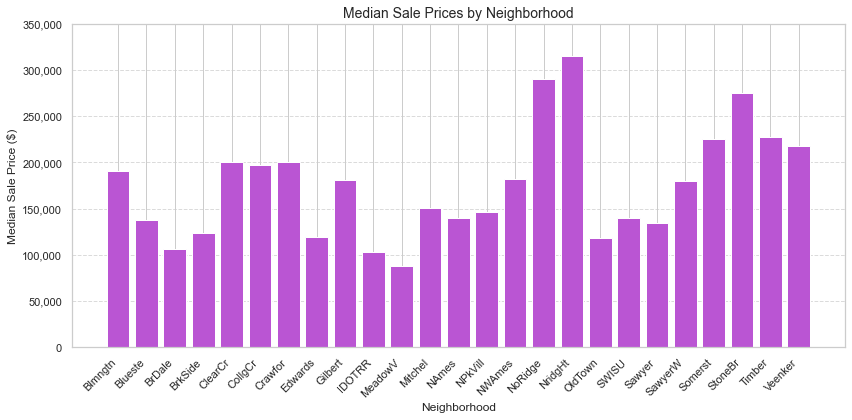

In [219]:
# Choosing a medium shade of purple color
color = 'mediumorchid'

# Bar chart of median sale prices by neighborhood with a uniform purple color
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_medians['Neighborhood'], neighborhood_medians['SalePrice'], color=color)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Median Sale Price ($)', fontsize=12)
plt.title('Median Sale Prices by Neighborhood', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 350001, 50000), labels=[f'{x:,}' for x in range(0, 350001, 50000)])
plt.ylim(0, 350000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





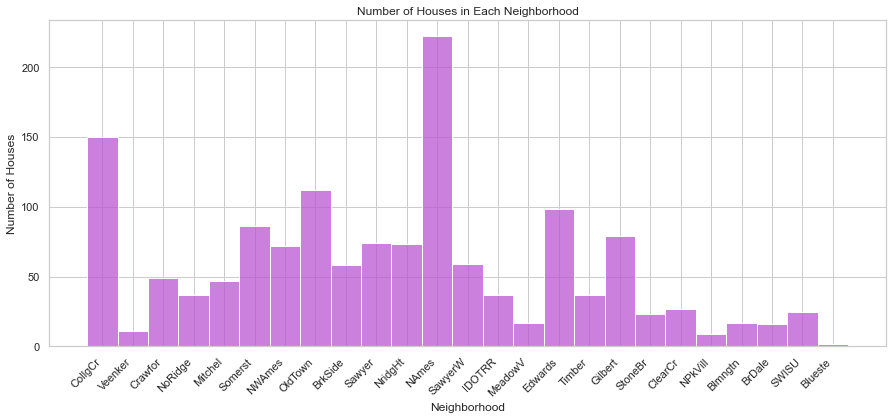

In [220]:
# Bar chart of the number of houses in each neighborhood with a uniform purple color
plt.figure(figsize=(15, 6))
sns.histplot(x='Neighborhood', data=df_filtered_2, stat='count', discrete=True, color='mediumorchid')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses')
plt.title('Number of Houses in Each Neighborhood')
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
<span style="color: mediumpurple; font-size: 18px;">✨ Wealth Segmentation:</span>

🏡 In this section, the author categorizes neighborhoods (Neighborhood) into three tiers based on the median and average SalePrice. The categories are "Wealthy" (2), "Middle" (1), and "Poor" (0). The categorization considers three neighborhoods with higher sale prices and three neighborhoods with lower sale prices.
</div>




In [221]:
# Creating categories for wealthy, middle, and poor neighborhoods
neighborhood_rich = ['StoneBr', 'NridgHt', 'NoRidge'] # above 250k
neighborhood_poor = ['MeadowV', 'IDOTRR', 'BrDale'] # below 110k

df_filtered_2['NeighRich'] = 1  # Defaulting to "Middle"
df_filtered_2.loc[df_filtered_2['Neighborhood'].isin(neighborhood_rich), 'NeighRich'] = 2  # Setting to "Wealthy"
df_filtered_2.loc[df_filtered_2['Neighborhood'].isin(neighborhood_poor), 'NeighRich'] = 0  # Setting to "Poor"

# Displaying the number of observations in each category
print(df_filtered_2['NeighRich'].value_counts())


1    1234
2     133
0      70
Name: NeighRich, dtype: int64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

<span style="color: mediumpurple; font-size: 18px;">✨ Significance of Neighborhood Segmentation:</span>

🏡 **Improved Model Fit:**
   - When modeling property prices, it's essential to consider differences in prices across different neighborhoods. Segmentation into categories allows the model to better adapt to local market conditions, leading to more accurate predictions.

🏡 **Diversity in Price Trends:**
   - Categories reflect variations in price trends between neighborhoods, enabling the model to account for price volatility in analysis and predictions.

🏡 **Model Complexity Reduction:**
   - Instead of treating each neighborhood as a separate category, segmentation into wealthy, middle, and poor categories reduces model complexity, which can increase its stability and interpretability.

🏡 **Inclusion of Socio-Economic Factors:**
   - Neighborhood categories may reflect certain socio-economic aspects such as living standards, infrastructure, or service availability. Incorporating these factors can improve the model's accuracy and its ability to predict property prices.

🏡 **Personalization of Real Estate Advisory:**
   - Modeling prices based on neighborhood categories can assist real estate advisors in tailoring offers to clients' preferences and expectations regarding location and quality of life.

🏡 **Optimization of Resource Allocation:**
   - Segmentation into categories helps better understand which real estate market areas are more attractive or have greater growth potential, which can be helpful in resource allocation and investment strategies.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 4.Analysis of Target Variable(SalePrice)
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Price distribution - Histogram and box plot
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">📊 Importance of Analyzing "SalePrice" Histogram:</span>

1. **Price Distribution:** 
 
 🏡 It helps understand which prices are most common and the general shape of the data distribution. Whether they follow normal distributions, are skewed, or if there are outliers present.

2. **Distribution Identification:** 
 
 🏡 The histogram allows for a quick identification of the price distribution, which is fundamental in data analysis before modeling. It can provide insights into the nature of the data and potential transformations that can be applied.

3. **Outlier Visualization:** 
 
 🏡 Outliers may be easier to identify on a histogram. Visibility of density and concentration of values enables quick detection of unusual observations.

4. **Assessment of Data Uniformity:** 
 
 🏡 The histogram allows assessing whether there is an uneven distribution of data across different price ranges.

Overall, analyzing the "SalePrice" histogram is the first step towards understanding the characteristics of this variable, which is essential before modeling.

</div>


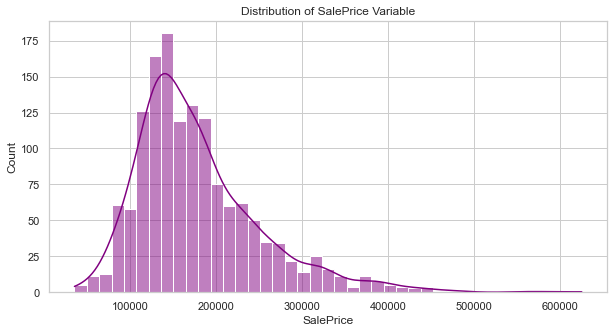

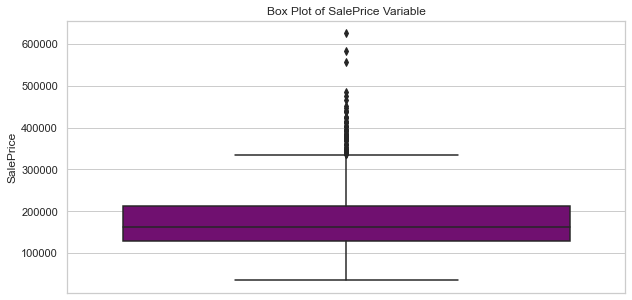

In [222]:
# Histogram of the SalePrice variable
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_2['SalePrice'], kde=True, color='purple')
plt.title('Distribution of SalePrice Variable')
plt.xlabel('SalePrice')
plt.show()

# Box plot of the SalePrice variable
plt.figure(figsize=(10, 5))
sns.boxplot(y='SalePrice', data=df_filtered_2, color='purple')
plt.title('Box Plot of SalePrice Variable')
plt.ylabel('SalePrice')
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Log Transformation
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">📊 Significance of Logarithmic Transformation for the "SalePrice" Variable:</span>

1.**Non-Normal Distribution:**
 
🏡 The "SalePrice" variable does not exhibit a normal distribution. This can be observed based on its characteristics, such as a "pointy" shape, positive skewness, and lack of alignment with the diagonal line in the quantile plot.

2.**Impact on Statistical Analyses and Predictive Models:**

🏡 Having a non-normal distribution can affect the results of statistical analyses and predictive models that assume a normal distribution of data.

3.**Logarithmic Transformation:**

🏡 To address this issue, we can perform a data transformation, and logarithmic transformation is one of the popular approaches. Logarithmic transformation often helps in situations where we encounter positive skewness in the data distribution.

4.**Benefits of Transformation:**

🏡 Logarithmic transformation can assist in bringing the distribution of the "SalePrice" variable closer to a normal distribution, which may improve the results of statistical analyses and model predictions.

</div>

In [223]:
# Perform a logarithmic transformation of the SalePrice variable
df_filtered_2['LogSalePrice'] = np.log(df_filtered_2['SalePrice'])


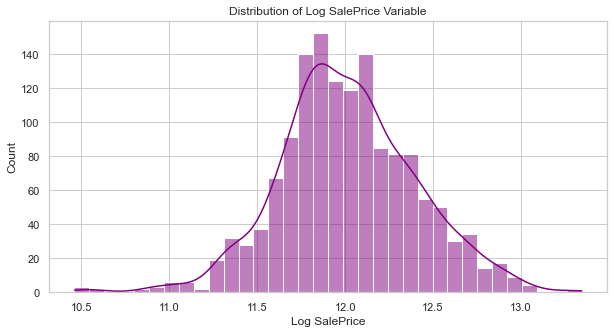

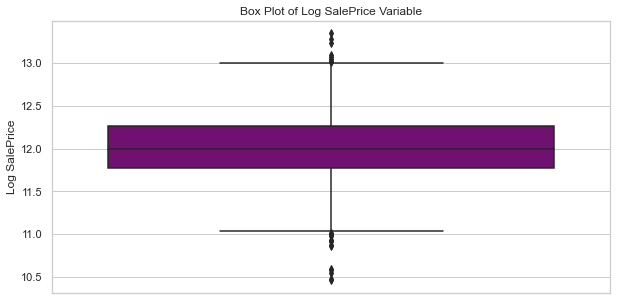

In [224]:
# Histogram of the Log SalePrice variable
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_2['LogSalePrice'], kde=True, color='purple')
plt.title('Distribution of Log SalePrice Variable')
plt.xlabel('Log SalePrice')
plt.show()

# Box plot of the Log SalePrice variable
plt.figure(figsize=(10, 5))
sns.boxplot(y='LogSalePrice', data=df_filtered_2, color='purple')
plt.title('Box Plot of Log SalePrice Variable')
plt.ylabel('Log SalePrice')
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.Multicolinearity problem
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">⚠️ Issues with Multicollinearity:</span>

🏡1.Redundancy of Information- Multicollinear variables may contain the same or similar information, which does not add new data to the model but increases the complexity of analysis.

🏡 2.Uncertainty of Coefficients- Multicollinearity can make the coefficients estimated by the model less stable and harder to interpret, as they may exhibit high variability depending on small changes in the data.

🏡3.Misinterpretation of Variable Impact- It may lead to a misconception about the true impact of individual variables on the dependent variable.

</div>



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 5.1. Multicollinearity reduction
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">🔍 Reducing Multicollinearity:</span>

🏡1.Variable Selection- Choose a set of variables that are most significant for the model and eliminate unnecessary or highly correlated variables.

🏡2.Variable Transformation- Transform variables, for example, through standardization or normalization, which can help reduce correlations between them.

🏡3.Model Regularization- Apply regularization techniques such as LASSO (L1) or Ridge (L2), which penalize large coefficient values, thus aiding in reducing the influence of less significant variables.

🏡4.Correlation Matrix Analysis-Review the correlation matrix to identify strongly correlated variables and take action to eliminate multicollinearity.


</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Correlation Matrix Analysis
</div> 

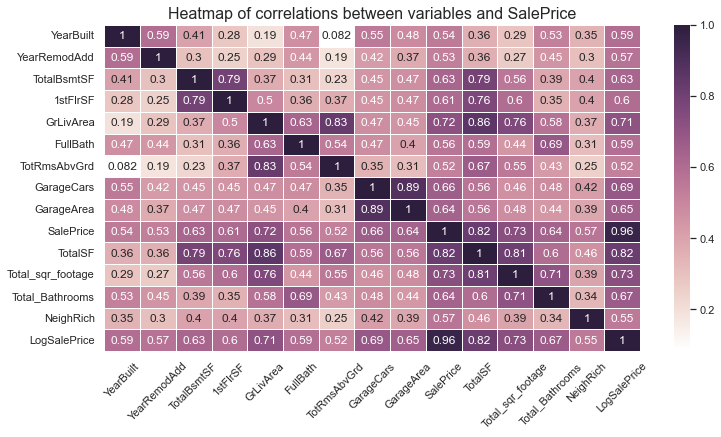

Variables highly correlated with SalePrice:
Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'TotalSF', 'Total_sqr_footage', 'Total_Bathrooms', 'NeighRich',
       'LogSalePrice'],
      dtype='object')


In [225]:
# Setting the Seaborn style to a darker theme
sns.set_style("darkgrid")

# Selecting only numerical variables
numeric_variables = df_filtered_2.select_dtypes(include=[np.number])

# Calculating the correlation between SalePrice and other numerical variables
correlation_matrix = numeric_variables.corr()
correlation_with_saleprice = correlation_matrix['SalePrice']

# Selecting variables with high correlation (e.g., > 0.5) with SalePrice
highly_correlated_variables = correlation_with_saleprice[correlation_with_saleprice > 0.5].index

# Creating a more elegant correlation heatmap
plt.figure(figsize=(12, 6))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)  # Using a "cubehelix" color palette
sns.heatmap(numeric_variables[highly_correlated_variables].corr(), annot=True, cmap=cmap, linewidths=.5)
plt.title('Heatmap of correlations between variables and SalePrice', fontsize=16)
plt.xticks(rotation=45)  # Rotating X-axis labels for better readability
plt.show()

# Printing variables highly correlated with SalePrice
print("Variables highly correlated with SalePrice:")
print(highly_correlated_variables)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Variables with the biggest correlation problem
</div> 

In [921]:
highly_correlated_variables


Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'TotalSF', 'Total_sqr_footage', 'Total_Bathrooms', 'NeighRich',
       'LogSalePrice'],
      dtype='object')

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Basement variables correlation
</div> 




In [226]:
# Creating correlation matrix
correlation_matrix = numeric_variables.corr()

# Displaying correlations between variables
print("Correlation between TotalBsmtSF and 1stFlrSF:", correlation_matrix['TotalBsmtSF']['1stFlrSF'])
print("Correlation between TotalBsmtSF and SalePrice:", correlation_matrix['TotalBsmtSF']['SalePrice'])
print("Correlation between 1stFlrSF and SalePrice:", correlation_matrix['1stFlrSF']['SalePrice'])

# Displaying correlations between variables
print("Correlation between TotalBsmtSF and 1stFlrSF:", correlation_matrix['TotalBsmtSF']['1stFlrSF'])
print("Correlation between TotalBsmtSF and SalePrice:", correlation_matrix['TotalBsmtSF']['SalePrice'])
print("Correlation between TotalBsmtSF and Total_sqr_footage:", correlation_matrix['TotalBsmtSF']['Total_sqr_footage'])

print("Correlation between Total_sqr_footage and SalePrice:", correlation_matrix['Total_sqr_footage']['SalePrice'])



Correlation between TotalBsmtSF and 1stFlrSF: 0.7890609893319648
Correlation between TotalBsmtSF and SalePrice: 0.6274831664002714
Correlation between 1stFlrSF and SalePrice: 0.6077161416333909
Correlation between TotalBsmtSF and 1stFlrSF: 0.7890609893319648
Correlation between TotalBsmtSF and SalePrice: 0.6274831664002714
Correlation between TotalBsmtSF and Total_sqr_footage: 0.5574781995815887
Correlation between Total_sqr_footage and SalePrice: 0.7346211114358934


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">
<span style="color: mediumpurple; font-size: 18px;">🔍 Removing reasons:</span>

🏡Removing auxiliary variables such as 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', and '2ndFlrSF' can be a good idea for several reasons:

🏡Reducing Model Complexity: These variables may contain similar information to the variable 'Total_sqr_footage', leading to data redundancy. Removing unnecessary auxiliary variables helps simplify the model, which can increase its stability and interpretability.

🏡Avoiding Multicollinearity: Multicollinearity occurs when variables are strongly correlated with each other. In this case, 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', and '2ndFlrSF' are often highly correlated with 'Total_sqr_footage'. Removing these auxiliary variables helps avoid the problem of multicollinearity, which can lead to unstable coefficient estimates in the model.

🏡Additionally, we created a new variable through feature engineering, namely 'Total_sqr_footage', which has a greater impact on 'SalePrice' than a similar variable 'TotalBsmtSF'. This indicates that the aggregated variable 'Total_sqr_footage' captures more relevant information regarding the total square footage of the house compared to 'TotalBsmtSF'. Therefore, retaining 'Total_sqr_footage' while removing similar auxiliary variables can enhance the predictive power of the model and improve its performance in predicting house prices.

</div>
   
    



In [227]:
# Removing
df_filtered_2.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','BsmtFinSF1','BsmtFinSF2'], axis=1, inplace=True)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

###  'YearBuilt'/'YearRemodAdd' Correlation
</div> 

In [228]:
# Creating correlation matrix
correlation_matrix = numeric_variables.corr()

# Correlation between 'YearBuilt' and 'SalePrice'
correlation_yearbuilt = correlation_matrix['YearBuilt']['SalePrice']
print(f"Correlation between YearBuilt and SalePrice: {correlation_yearbuilt}")

# Correlation between 'YearRemodAdd' and 'SalePrice'
correlation_yearremodadd = correlation_matrix['YearRemodAdd']['SalePrice']
print(f"Correlation between YearRemodAdd and SalePrice: {correlation_yearremodadd}")

# Correlation between 'YearBuilt' and 'YearRemodAdd'
correlation_years = correlation_matrix['YearBuilt']['YearRemodAdd']
print(f"Correlation between YearBuilt and YearRemodAdd: {correlation_years}")



Correlation between YearBuilt and SalePrice: 0.5445646829226998
Correlation between YearRemodAdd and SalePrice: 0.529073224406743
Correlation between YearBuilt and YearRemodAdd: 0.59386367096357


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">🏡 Date Correlations:</span>

🏡1.Similar Correlations-The correlations between 'YearBuilt' and 'YearRemodAdd' with the target variable 'SalePrice' are similar (0.55 for 'YearBuilt' and 0.53 for 'YearRemodAdd'). This suggests that both variables may have a similar impact on the property price.

🏡2.High Correlation Between 'YearBuilt' and 'YearRemodAdd'- Due to the high correlation between 'YearBuilt' and 'YearRemodAdd' (0.59), consider removing one of these variables to avoid excessive association in the model.

🏡3.Decision- It is worth considering retaining one of these variables that is more significant for the analysis. For example, 'YearBuilt' may be the preferred option due to potentially more recent information reflecting the year of property construction.

</div>



In [229]:
# Drop variable 'YearRemodAdd'


df_filtered_2.drop(['YearRemodAdd'], axis=1, inplace=True)



 <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Garage variables- 'GarageArea', 'GarageCars','GarageYrBlt'
</div> 
 



In [230]:
# Selection of variables of interest
selected_vars = ['GarageArea', 'GarageCars', 'GarageYrBlt', 'SalePrice']

# Displaying the correlation matrix
correlation_matrix = df_filtered_2[selected_vars].corr()
print(correlation_matrix)



             GarageArea  GarageCars  GarageYrBlt  SalePrice
GarageArea     1.000000    0.888464     0.470509   0.641349
GarageCars     0.888464    1.000000     0.480103   0.660476
GarageYrBlt    0.470509    0.480103     1.000000   0.482761
SalePrice      0.641349    0.660476     0.482761   1.000000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">🚗 Garage Correlations:</span>

🏠1.High Correlation-'GarageArea' and 'GarageCars' exhibit a very high correlation of 0.88. This implies that the garage area is strongly associated with the number of cars it can accommodate.

🏠2.Decision on Retention- In such a case, one may consider removing one of these variables or retaining one that fits more logically into the analysis.

🏠3.Variable Selection- I choose to retain 'GarageCars' as it has a higher correlation with 'SalePrice', suggesting that the number of cars in the garage may have a greater impact on the property price.

🏠4.Exclusion of Garage Year Built- The year the garage was built will be excluded as I believe it is not a significant piece of information for the analysis.

</div>



In [231]:
# Removing variables 'GarageArea' and 'GarageYrBlt'


df_filtered_2.drop(['GarageArea', 'GarageYrBlt'], axis=1, inplace=True)




  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Bathroom variables- 'BsmtFullBath','FullBath','HalfBath
</div> 
 
 

 

In [232]:
correlation_matrix = df_filtered_2[['BsmtFullBath', 'FullBath', 'HalfBath', 'SalePrice','Total_Bathrooms']].corr()
print(correlation_matrix)


                 BsmtFullBath  FullBath  HalfBath  SalePrice  Total_Bathrooms
BsmtFullBath         1.000000 -0.084351 -0.034518   0.224133         0.575973
FullBath            -0.084351  1.000000  0.132295   0.563228         0.685500
HalfBath            -0.034518  0.132295  1.000000   0.295499         0.392668
SalePrice            0.224133  0.563228  0.295499   1.000000         0.640420
Total_Bathrooms      0.575973  0.685500  0.392668   0.640420         1.000000


In [233]:

df_filtered_2.drop(['BsmtFullBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Porch Variables
</div> 
 
 

In [234]:
df_filtered_2.drop(['OpenPorchSF', '3SsnPorch', 'EnclosedPorch','ScreenPorch','WoodDeckSF'], axis=1, inplace=True)




  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Correlation situation now
</div> 

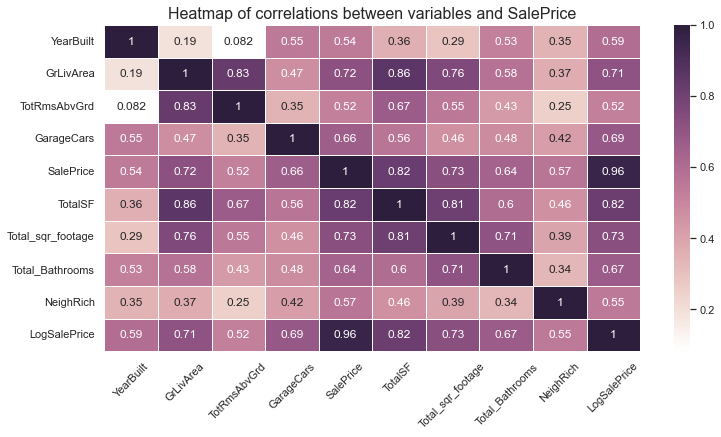

Variables highly correlated with SalePrice:
Index(['YearBuilt', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice',
       'TotalSF', 'Total_sqr_footage', 'Total_Bathrooms', 'NeighRich',
       'LogSalePrice'],
      dtype='object')


In [235]:
# Setting Seaborn style to "darkgrid"
sns.set_style("darkgrid")

# Selecting only numerical variables
numeric_variables = df_filtered_2.select_dtypes(include=[np.number])

# Calculating correlation between SalePrice and other numerical variables
correlation_matrix = numeric_variables.corr()
correlation_with_saleprice = correlation_matrix['SalePrice']

# Selecting variables highly correlated with SalePrice (e.g., > 0.5)
highly_correlated_variables = correlation_with_saleprice[correlation_with_saleprice > 0.5].index

# Creating a more elegant correlation heatmap
plt.figure(figsize=(12, 6))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)  # Cubehelix color palette
sns.heatmap(numeric_variables[highly_correlated_variables].corr(), annot=True, cmap=cmap, linewidths=.5)
plt.title('Heatmap of correlations between variables and SalePrice', fontsize=16)
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.show()

# Printing variables highly correlated with SalePrice
print("Variables highly correlated with SalePrice:")
print(highly_correlated_variables)


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Highly correcalted values now
</div> 

In [236]:
highly_correlated = []

correlation_matrix = df_filtered_2.corr()
corr_threshold = 0.5

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            highly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for var1, var2, corr in highly_correlated:
    print(f"Correlation between {var1} a {var2}: {corr}")


Correlation between BedroomAbvGr a GrLivArea: 0.5504759557050768
Correlation between TotRmsAbvGrd a GrLivArea: 0.8308432581735885
Correlation between TotRmsAbvGrd a BedroomAbvGr: 0.6922439704463675
Correlation between GarageCars a YearBuilt: 0.5494088292780918
Correlation between SalePrice a YearBuilt: 0.5445646829226998
Correlation between SalePrice a GrLivArea: 0.7178527463469911
Correlation between SalePrice a TotRmsAbvGrd: 0.523565811089751
Correlation between SalePrice a GarageCars: 0.6604758981409928
Correlation between TotalSF a GrLivArea: 0.8587153803789788
Correlation between TotalSF a TotRmsAbvGrd: 0.6724114969737289
Correlation between TotalSF a GarageCars: 0.5645811468002704
Correlation between TotalSF a SalePrice: 0.8217548862897509
Correlation between Total_sqr_footage a GrLivArea: 0.7567275381319702
Correlation between Total_sqr_footage a TotRmsAbvGrd: 0.552602034411936
Correlation between Total_sqr_footage a SalePrice: 0.7346211114358934
Correlation between Total_sqr_fo

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">🔍 Multicollinearity Analysis:</span>

🏠 GrLivArea and TotRmsAbvGrd: A correlation of 0.83 suggests a strong relationship between the total living area and the total number of rooms above ground.

🏠 TotalSF and GrLivArea: A correlation of 0.86 indicates a strong relationship between the total square footage and the total living area.

🏠 Total_sqr_footage and TotalSF: A correlation of 0.81 suggests a strong relationship between the total square footage and the total square footage of the property.

🚿 Total_Bathrooms and Total_sqr_footage: A correlation of 0.71 indicates a strong relationship between the total number of bathrooms and the total square footage.

**Recommended Strategy:**

🏠 Consider removing one of the correlated variables from each pair to avoid excessive correlation in the model.

🏠 You can also use dimensionality reduction techniques such as PCA to reduce the number of variables and mitigate multicollinearity issues.

The final decision should depend on the context of the data and the analysis goals. For now, I will leave these variables in, but you may consider removing some and experimenting with different approaches.
</div>







<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 6.One hot encoding
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

<span style="color: mediumpurple; font-size: 18px;">🔥 One-hot Encoding:</span>

- 🏠 **Category to Column Transformation:** Each unique categorical value is transformed into a new column, preserving category-related information.

- 🏠 **Assignment of Binary Values:** In the new columns, a 1 is placed in the position corresponding to the value of the row in the original column, and 0s are placed elsewhere.

- 🏠 **Facilitating Processing in Models:** This technique allows for easier processing of categorical data in machine learning models that operate on numerical values.

- 🏠 **Avoidance of Interpretation Errors:** One-hot encoding eliminates the problem of interpreting numbers as ordinal values, which is a common mistake with categorical data.

- 🏠 **Improvement of Model Performance:** With one-hot encoding, machine learning models can better handle categorical data, leading to improved performance and prediction accuracy.

</div>



In [238]:
categorical_columns.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [298]:
categorical_columns = df_filtered_2.select_dtypes(include=['object']).columns

# Add columns for one-hot encoding
additional_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'Fence', 'MoSold', 'NeighRich']
categorical_columns = categorical_columns.union(additional_columns)

# Perform one-hot encoding on selected categorical variables
df_encoded = pd.get_dummies(df_filtered_2, columns=categorical_columns)

# Set the maximum number of displayed columns to None to see all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame after applying encoding
df_encoded = df_encoded.apply(pd.to_numeric)
df_encoded.head()


LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtUnfSF  LowQualFinSF  \
0         65.0     8450       2003       196.0        150             0   
1         80.0     9600       1976         0.0        284             0   
2         68.0    11250       2001       162.0        434             0   
3         60.0     9550       1915         0.0        540             0   
4         84.0    14260       2000       350.0        490             0   

   GrLivArea  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0       1710             0             3             1             8   
1       1262             1             3             1             6   
2       1786             0             3             1             6   
3       1717             0             3             1             7   
4       2198             0             4             1             9   

   Fireplaces  GarageCars  PoolArea  MiscVal  YrSold  SalePrice  TotalSF  \
0           0           2         0        0    2008     208500     2566   
1           1           2         0        0    2007     181500     2524   
2           1           2         0        0    2008     223500     2706   
3           1           3         0        0    2006     140000     2473   
4           1           3         0        0    2008     250000     3343   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  LogSalePrice  \
0               2416              3.5              61     12.247694   
1               2240              2.5             298     12.109011   
2               2272              3.5              42     12.317167   
3               1933              2.0             307     11.849398   
4               2853              3.5             276     12.429216   

   BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   B

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 7.Normalization and Scaling of Data
</div>  

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">
<span style="color: mediumpurple; font-size: 18px;">📊 Normalization and Scaling:</span>

🏠Normalization or scaling can be the next step after applying one-hot encoding, especially if you plan to use algorithms that are sensitive to differences in the scale of variables or require all variables to be scaled to a similar range of values.

🏠Some common techniques for normalization or scaling include:

🏠🏠Min-max scaling: Scaling values to the range [0, 1].

🏠🏠Standardization (z-score normalization): Transforming values to have a mean of 0 and a standard deviation of 1.

The choice of the appropriate scaling technique depends on the characteristics of the data and the requirements of the specific machine learning model.

</div>


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 7.1 Normalisation
</div>  

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">
<span style="color: mediumpurple; font-size: 18px;">📊 Feature Normalization:</span>

🏠Definition:
- Normalization is the process of transforming the distribution of numerical feature values to have a mean of zero and a standard deviation of one.

🏠Procedure:
- Each numerical feature is normalized separately. The normalization process involves subtracting the mean value of the feature from each value of that feature, and then dividing the result by the standard deviation of the feature.

🏠Purpose:
- Normalization helps to maintain the proportions between feature values, but on a scale where values have a mean close to zero and a standard deviation close to one.

🏠Example:
- For a feature with values ranging from 0 to 100, after normalization, these values would be rescaled to have a mean value of 0 and a standard deviation of 1.

🏠Application:
- Normalization facilitates comparison between features and improves the performance of machine learning algorithms, especially those sensitive to differences in data scale.

</div>



In [299]:
# Select only numerical features from the DataFrame df_final_2
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_df = df_encoded[numerical_columns]




In [300]:
numerical_df.shape

(1437, 22)

In [301]:
numerical_df.head()

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtUnfSF  LowQualFinSF  \
0         65.0     8450       2003       196.0        150             0   
1         80.0     9600       1976         0.0        284             0   
2         68.0    11250       2001       162.0        434             0   
3         60.0     9550       1915         0.0        540             0   
4         84.0    14260       2000       350.0        490             0   

   GrLivArea  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0       1710             0             3             1             8   
1       1262             1             3             1             6   
2       1786             0             3             1             6   
3       1717             0             3             1             7   
4       2198             0             4             1             9   

   Fireplaces  GarageCars  PoolArea  MiscVal  YrSold  SalePrice  TotalSF  \
0           0           2         0        0    2008     208500     2566   
1           1           2         0        0    2007     181500     2524   
2           1           2         0        0    2008     223500     2706   
3           1           3         0        0    2006     140000     2473   
4           1           3         0        0    2008     250000     3343   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  LogSalePrice  
0               2416              3.5              61     12.247694  
1               2240              2.5             298     12.109011  
2               2272              3.5              42     12.317167  
3               1933              2.0             307     11.849398  
4               2853              3.5             276     12.429216

In [302]:
# Initialize the scaler object
scaler = StandardScaler()

# Perform normalization only for numerical features
numerical_df_normalized = scaler.fit_transform(numerical_df)
df_normalized = pd.DataFrame(numerical_df_normalized, columns=numerical_columns)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">
<span style="color: mediumpurple; font-size: 18px;">📊 Impact of Standardization on the Range of Normalized Data:</span>
    
🏠 Standardization of data aims to rescale features so that their mean value is 0 and the standard deviation is 1.

🏠 However, the range of normalized data, typically falling within the interval from -3 to 3, is not a strict boundary.

🏠 Where exactly the normalized values will lie depends on the original distribution of the data.

🏠 If the distribution of the original data was skewed or contained large outliers, the normalized values may extend beyond the range of -3 to 3.

🏠 Generally, normalized data clusters around zero, with most values falling within the range of -3 to 3.

🏠 However, there is a possibility that not all data points will fall within this range, depending on the nature of the original data and the presence of outliers.

</div>



In [303]:
df_normalized['id'] = df_normalized.reset_index().index
df_normalized.head()

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtUnfSF  LowQualFinSF  \
0    -0.222236 -0.193222   1.057644    0.568839  -0.946052     -0.121214   
1     0.493953 -0.075243   0.162922   -0.574906  -0.639652     -0.121214   
2    -0.078998  0.094032   0.991368    0.370434  -0.296668     -0.121214   
3    -0.460965 -0.080372  -1.858487   -0.574906  -0.054292     -0.121214   
4     0.684936  0.402831   0.958230    1.467495  -0.168620     -0.121214   

   GrLivArea  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0   0.439015     -0.239875      0.169143     -0.207845      0.957752   
1  -0.481122      3.963785      0.169143     -0.207845     -0.300858   
2   0.595110     -0.239875      0.169143     -0.207845     -0.300858   
3   0.453393     -0.239875      0.169143     -0.207845      0.328447   
4   1.441308     -0.239875      1.402941     -0.207845      1.587058   

   Fireplaces  GarageCars  PoolArea   MiscVal    YrSold  SalePrice   TotalSF  \
0   -0.945971    0.341394   -0.0585 -0.088392  0.141123   0.412439  0.051966   
1    0.627362    0.341394   -0.0585 -0.088392 -0.609965   0.044854 -0.005917   
2    0.627362    0.341394   -0.0585 -0.088392  0.141123   0.616652  0.244912   
3    0.627362    1.704127   -0.0585 -0.088392 -1.361053  -0.520136 -0.076205   
4    0.627362    1.704127   -0.0585 -0.088392  0.141123   0.977429  1.122815   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  LogSalePrice  id  
0           0.662492         1.699081       -0.765647      0.599225   0  
1           0.404217         0.398639        0.772344      0.243229   1  
2           0.451176         1.699081       -0.888946      0.777558   2  
3          -0.046299        -0.251582        0.830749     -0.423189   3  
4           1.303779         1.699081        0.629577      1.065185   4

In [304]:
df_normalized.shape

(1437, 23)

In [305]:
# Filtering numerical variables
num_col = df_filtered_2.select_dtypes(include=['number']).columns.tolist()

# Displaying columns from df_encoded, excluding columns contained in num_col
columns_to_include = [col for col in df_encoded.columns if col not in num_col]

# Creating merging_df
merging_df = df_encoded[columns_to_include]

merging_df['id'] = merging_df.reset_index().index

# Displaying merging_df
merging_df.head()


C:\Users\weron\AppData\Local\Temp/ipykernel_30724/2197826416.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_df['id'] = merging_df.reset_index().index


BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [306]:
# Merge encoded categorical variables with normalized numerical features
df_final_normalized = pd.merge(merging_df, df_normalized, on='id')
df_final_normalized = df_final_normalized.drop('id', axis=1)
df_final_normalized.head()


BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [307]:
df_final_normalized.shape

(1437, 312)

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 7.2 Scalling
</div>  

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: justify;">

🏠 **Data Scaling** is a commonly used technique in data analysis and machine learning. It involves changing the range or distribution of feature values to facilitate analysis or improve algorithm performance.

🏠 **Min-Max Scaling**, also known as normalization, is one of the fundamental methods of data scaling. It involves transforming feature values so that they fall within a specified range, typically from 0 to 1.

🏠 This technique is applied in situations where there is a need to maintain proportions between different features, as well as in cases where learning algorithms require data with a specific range of values.

🏠 Min-Max Scaling is relatively easy to understand and implement, making it a popular data scaling technique, especially when feature values do not need to be interpreted in the context of real units of measurement.

🏠 This technique can be useful for learning algorithms that use distance measures, such as k-means algorithms or decision tree-based algorithms.


</div>


In [308]:
scaler = MinMaxScaler()  # Initializing the scaler object
numerical_df_scaled = scaler.fit_transform(numerical_df)  # Performing scaling

# Creating a DataFrame with scaled data
df_scaled = pd.DataFrame(numerical_df_scaled, columns=numerical_columns)



In [309]:
df_scaled['id'] = df_scaled.reset_index().index
df_scaled.head()

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtUnfSF  LowQualFinSF  \
0     0.150685  0.033420   0.949275     0.12250   0.069670           0.0   
1     0.202055  0.038795   0.753623     0.00000   0.131909           0.0   
2     0.160959  0.046507   0.934783     0.10125   0.201579           0.0   
3     0.133562  0.038561   0.311594     0.00000   0.250813           0.0   
4     0.215753  0.060576   0.927536     0.21875   0.227589           0.0   

   GrLivArea  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0   0.417856           0.0         0.375      0.333333      0.500000   
1   0.281810           0.5         0.375      0.333333      0.333333   
2   0.440935           0.0         0.375      0.333333      0.333333   
3   0.419982           0.0         0.375      0.333333      0.416667   
4   0.566049           0.0         0.500      0.333333      0.583333   

   Fireplaces  GarageCars  PoolArea  MiscVal  YrSold  SalePrice   TotalSF  \
0    0.000000    0.666667       0.0      0.0    0.50   0.294187  0.427341   
1    0.333333    0.666667       0.0      0.0    0.25   0.248432  0.419299   
2    0.333333    0.666667       0.0      0.0    0.50   0.319607  0.454145   
3    0.333333    1.000000       0.0      0.0    0.00   0.178105  0.409535   
4    0.333333    1.000000       0.0      0.0    0.50   0.364514  0.576106   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  LogSalePrice  id  
0           0.444872              0.5        0.059396      0.619511   0  
1           0.407265              0.3        0.290166      0.571445   1  
2           0.414103              0.5        0.040896      0.643589   2  
3           0.341667              0.2        0.298929      0.481466   3  
4           0.538248              0.5        0.268744      0.682424   4

In [310]:
df_final_skaled  = pd.merge(merging_df, df_scaled, on='id')
df_final_skaled = df_final_skaled.drop('id', axis=1)

df_final_skaled.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [311]:
# Dropping the mentioned columns from the DataFrame df_final_scaled
df_final_skaled.drop(columns=['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                               'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
                               'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
                               'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                               'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
                               'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                               'Neighborhood_Veenker'], inplace=True)

# Dropping the same columns from the DataFrame df_final_normalized
df_final_normalized.drop(columns=['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                                    'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
                                    'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
                                    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                                    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
                                    'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                                    'Neighborhood_Veenker'], inplace=True)


In [312]:
df_final_skaled.shape

(1437, 287)

In [313]:
df_final_normalized.shape

(1437, 287)

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Scalling/Normalisation-what to choose?
</div> 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: justify;">

🏠 Choosing the appropriate method

You can choose which method you want to apply based on the modeling methods you plan to use. Some models, such as logistic regression or SVM, may require scaling, while others, like decision trees or Random Forest, may be less sensitive to these transformations.

🏠 Sensitivity of models to scaling

SVM and neural networks may require normalization as they are sensitive to differences in value ranges. Depending on the models you intend to use, it's worth conducting tests on data after normalization and scaling to see what results they yield. This will help you choose the best data preparation technique for a specific model.

🏠 Testing different techniques

Remember that each data transformation should be performed on the training set and then applied to the test set to avoid information leakage and maintain data consistency. Before applying these techniques, make sure your data is already split into training and test sets.






</div>







  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 8.Pipeline-test data transformation
</div>  

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

🏠 **Maintaining Consistency of Training and Test Data:**
After processing the training data, it's important to maintain consistency between the training and test data. Therefore, it's necessary to perform the same data processing steps on the test set as on the training set. This is crucial for the proper functioning of the model and to avoid information leakage.

🏠 **Applying Equivalent Transformations to Test Data:**
In essence, after transforming the training data, the next step is to apply the same transformations (handling missing values, removing outliers, one-hot encoding, and Min-Max scaling) to the test data. This ensures consistency between the training and test data, which is essential for accurate predictions using the model.


In [314]:
# test data
df_test = pd.read_csv('test_data.csv')

In [315]:
df_test.shape

(1459, 80)

In [316]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

#### Remove the 'Id' column if it exists

def drop_id_column(df):
    if 'Id' in df.columns:
        return df.drop('Id', axis=1)
    else:
        return df

#### Function to process numeric features and fill them with median/mean similar to the training set

def process_numeric_features(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        if df[column].isnull().sum() > 0:
            if skew(df[column].dropna()) < 0.5:
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                df[column].fillna(df[column].median(), inplace=True)
    return df

#### Function to process categorical features and fill them with most frequent values

def process_categorical_features(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode().iloc[0], inplace=True)
        df[column] = df[column].astype('category')
    return df

#### Function to remove outliers

def remove_outliers(df, criterion=3):
    # List of important columns
    important_columns = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'OverallQual']
    
    # Calculating mean and standard deviation for important numerical variables
    mean_values = df[important_columns].mean()
    std_dev_values = df[important_columns].std()

    # Initializing a list to store outlier indexes
    all_outlier_indexes = []

    # Detecting outliers for each important numerical variable
    for column in important_columns:
        column_mean = mean_values[column]
        column_std_dev = std_dev_values[column]
        column_outliers = df[column][(df[column] > column_mean + criterion * column_std_dev) |
                                      (df[column] < column_mean - criterion * column_std_dev)]
        # Adding outlier indexes to the list
        all_outlier_indexes.extend(column_outliers.index)

    # Removing duplicates from the list of outlier indexes
    all_outlier_indexes = list(set(all_outlier_indexes))

    # Removing rows containing outlier values
    df = df.drop(index=all_outlier_indexes)
    
    return df

#### Mapping some numeric column values to categorical similarly to the training set

def map_and_convert_to_category(df):
    # Creating mappings for 'MSSubClass' column
    mssubclass_mapping = {
20: 'One-story residential home',
    30: 'One-story residential home',
    40: 'One-story residential home with loft',
    45: 'One-story residential home with one and a half story',
    50: 'Two-story residential home - half duplex',
    60: 'Two-story residential home',
    70: 'Multi-family building - floor',
    75: 'Multi-family building - half floor',
    80: 'Multi-family building - attic',
    85: 'Multi-family building - attic',
    90: 'Multi-family building - floor',
    120: 'Single-family home - attic',
    150: 'Multi-family building - floor',
    160: 'Single-family home with low pitched roof',
    180: 'Multi-family building - floor',
    190: 'Multi-family building - floor',
    }
    
    # Creating mappings for 'OverallQual' column
    overallqual_mapping = {
    1: 'Very Poor Quality',
    2: 'Poor Quality',
    3: 'Average Quality',
    4: 'Below Average Quality',
    5: 'Average Quality',
    6: 'Above Average Quality',
    7: 'Good Quality',
    8: 'Excellent Quality',
    9: 'Very Excellent Quality',
    10: 'Highest Quality',
    }
    
    # Creating mappings for 'OverallCond' column
    overallcond_mapping = {
    1: 'Very Poor Condition',
    2: 'Poor Condition',
    3: 'Below Average Conditions',
    4: 'Average Conditions',
    5: 'Average Conditions',
    6: 'Above Average Conditions',
    7: 'Good Conditions',
    8: 'Excellent Conditions',
    9: 'Exceptional Conditions',
    }
    
    # Creating mappings for 'MoSold' column
    mosold_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    
        # Mapping 'MSSubClass' column
    df['MSSubClass'] = df['MSSubClass'].map(mssubclass_mapping).astype('category')
    
    # Mapping 'OverallQual' column
    df['OverallQual'] = df['OverallQual'].map(overallqual_mapping).astype('category')
    
    # Mapping 'OverallCond' column
    df['OverallCond'] = df['OverallCond'].map(overallcond_mapping).astype('category')
    
    # Mapping 'MoSold' column
    df['MoSold'] = df['MoSold'].map(mosold_mapping).astype('category')
    
    return df

#### Adding new features

def add_new_features(df):
    # Feature engineering for new feature "TotalSF"
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Feature engineering for new feature "Total_sqr_footage"
    df['Total_sqr_footage'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Feature engineering for new feature "Total_Bathrooms"
    df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    
    # Feature engineering for new feature "Total_porch_sf"
    df['Total_porch_sf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
    
    return df

#### Adding categories to some columns

def process_categorical_columns(df):
    # Check current categories in 'PoolQC' column
    if 'No Pool' not in df['PoolQC'].cat.categories:
        df['PoolQC'] = df['PoolQC'].cat.add_categories('No Pool')
    # Set missing values in 'PoolQC' column to 'No Pool'
    df['PoolQC'].fillna('No Pool', inplace=True)

    # Check current categories in 'Fence' column
    if 'No Fence' not in df['Fence'].cat.categories:
        df['Fence'] = df['Fence'].cat.add_categories('None')
    # Set missing values in 'Fence' column to 'No Fence'
    df['Fence'].fillna('None', inplace=True)
    # Convert 'Fence' variable to categorical type (factor)
    df['Fence'] = pd.Categorical(df['Fence'], categories=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], ordered=True)

    # Check current categories in 'FireplaceQu' column
    if 'No Fireplace' not in df['FireplaceQu'].cat.categories:
        df['FireplaceQu'] = df['FireplaceQu'].cat.add_categories('NoFireplace')
    # Set missing values in 'FireplaceQu' column to 'No Fireplace'
    df['FireplaceQu'].fillna('NoFireplace', inplace=True)
    
    return df

#### Dropping some columns

def drop_columns(df):
    columns_to_drop = ['Alley', 'MiscFeature', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'YearRemodAdd', 
                       'GarageArea', 'GarageYrBlt', 'BsmtFullBath', 'FullBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 
                       'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']
    df.drop(columns_to_drop, axis=1, inplace=True)
    return df

#### Categorizing neighborhood

def categorize_neighborhood(df):
    # Define rich and poor neighborhoods
    neighborhood_rich = ['StoneBr', 'NridgHt', 'NoRidge']  # above 250k
    neighborhood_poor = ['MeadowV', 'IDOTRR', 'BrDale']  # below 110k
    
    # Add a new column 'NeighRich' and set the default value to 1 ("Average")
    df['NeighRich'] = 1  
    
    # Set values to 2 ("Rich") for rich neighborhoods
    df.loc[df['Neighborhood'].isin(neighborhood_rich), 'NeighRich'] = 2  
    
    # Set values to 0 ("Poor") for poor neighborhoods
    df.loc[df['Neighborhood'].isin(neighborhood_poor), 'NeighRich'] = 0  
    
    return df

#### One-hot encoding

def one_hot_encode(df, additional_columns):
    additional_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'Fence', 'MoSold', 'NeighRich']

    # Add additional columns for one-hot encoding
    categorical_columns = df.select_dtypes(include=['category']).columns
    categorical_columns = categorical_columns.union(additional_columns)
    
    # Perform one-hot encoding on selected categorical variables
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    
    return df_encoded

#### Box-cox transformation

import pandas as pd
from scipy.stats import boxcox
from scipy.stats import skew

def apply_boxcox_transformation(df, lambda_range):
    # Filter numeric variables
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Select columns from df_encoded_test excluding those in num_cols
    columns_to_include = [col for col in df.columns if col not in num_cols]

    # Create merging_df DataFrame
    merging_df = df[columns_to_include]
    merging_df['id'] = merging_df.reset_index().index

    # Select only numeric features
    numeric_feats = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Initialize a dictionary to store the best lambda values for each variable
    best_lambdas = {}
    
    # Initialize DataFrame to store transformed data
    transformed_data = pd.DataFrame()

    # Iterate over each numeric variable
    for feature in numeric_feats:
       
        best_skewness = float('inf')
        best_lambda = None
        
        # Iterate over lambda range values
        for lmbda in lambda_range:
            # Apply Box-Cox transformation to the current lambda value
            transformed_feature = boxcox(df[feature] + 1, lmbda=lmbda)
            
            # Calculate skewness for the transformed variable
            current_skewness = skew(transformed_feature)
            
            # Check if a better skewness is achieved
            if abs(current_skewness) < abs(best_skewness):
                best_skewness = current_skewness
                best_lambda = lmbda
        
        # Save the best lambda value for the current variable
        best_lambdas[feature] = best_lambda

        # Apply Box-Cox transformation to the current lambda value
        transformed_feature = boxcox(df[feature] + 1, lmbda=best_lambda)

        # Add the transformed variable to the DataFrame
        transformed_data[feature] = transformed_feature
        
    # Merge df_scaled DataFrame with transformed_data DataFrame
    transformed_data['id'] =  transformed_data.reset_index().index
    df_final_transformed = pd.merge(merging_df, transformed_data, on='id')
    df_final_transformed = df_final_transformed.drop('id', axis=1)
    
    return df_final_transformed

#### Scaling

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def merge_and_scale_data(df):
    # Filter numeric variables
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Select columns from df_encoded_test excluding those in num_cols
    columns_to_include = [col for col in df.columns if col not in num_cols]

    # Create DataFrame merging_df
    merging_df = df[columns_to_include]
    merging_df['id'] = merging_df.reset_index().index

    # Select only numerical features from DataFrame df_encoded_test
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_df = df[numerical_columns]

    # Initialize scaler object
    scaler = MinMaxScaler()

    # Perform scaling on numerical data
    numerical_df_scaled = scaler.fit_transform(numerical_df)

    # Create DataFrame with scaled data
    df_scaled = pd.DataFrame(numerical_df_scaled, columns=numerical_columns)
    df_scaled['id'] = df_scaled.reset_index().index

    # Merge df_scaled DataFrame with merging_df DataFrame
    df_final_scaled = pd.merge(merging_df, df_scaled, on='id')
    df_final_scaled = df_final_scaled.drop('id', axis=1)

    return df_final_scaled

#### Dropping specific columns

def drop_columns1(df):
    columns_to_drop = ['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                               'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
                               'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
                               'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                               'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
                               'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                               'Neighborhood_Veenker','BsmtHalfBath','Neighborhood_CollgCr']
    
    columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
    if columns_to_drop_existing:
        df.drop(columns_to_drop_existing, axis=1, inplace=True)
    return df

from sklearn.preprocessing import FunctionTransformer

# Transform functions into transformers
drop_id_transformer = FunctionTransformer(drop_id_column)
process_numeric_transformer = FunctionTransformer(process_numeric_features)
process_categorical_transformer = FunctionTransformer(process_categorical_features)
remove_outliers_transformer = FunctionTransformer(remove_outliers)
map_and_convert_transformer = FunctionTransformer(map_and_convert_to_category)
add_new_features_transformer = FunctionTransformer(add_new_features)
process_categorical_columns_transformer = FunctionTransformer(process_categorical_columns)
drop_columns_transformer = FunctionTransformer(drop_columns)
categorize_neighborhood_transformer = FunctionTransformer(categorize_neighborhood)
one_hot_encode_transformer = FunctionTransformer(one_hot_encode, kw_args={'additional_columns': additional_columns})
apply_boxcox_transformation_transformer = FunctionTransformer(apply_boxcox_transformation, kw_args={'lambda_range': range(-5, 6)})
merge_and_scale_data_transformer = FunctionTransformer(merge_and_scale_data)
drop_columns1_transformer = FunctionTransformer(drop_columns1)

# Create the full pipeline
data_preprocessing_pipeline = Pipeline([
    ('drop_id', drop_id_transformer),
    ('process_numeric', process_numeric_transformer),
    ('process_categorical', process_categorical_transformer),
    ('remove_outliers', remove_outliers_transformer),
    ('map_and_convert', map_and_convert_transformer),
    ('add_new_features', add_new_features_transformer),
    ('process_categorical_columns', process_categorical_columns_transformer),
    ('drop_columns', drop_columns_transformer),
    ('categorize_neighborhood', categorize_neighborhood_transformer),
    ('one_hot_encode', one_hot_encode_transformer),
    ('apply_boxcox_transformation', apply_boxcox_transformation_transformer),
    ('merge_and_scale_data', merge_and_scale_data_transformer),
    ('drop_columns1', drop_columns1_transformer)
])


In [317]:
# Przepuść df_test przez pipeline
df_test_processed = data_preprocessing_pipeline.transform(df_test)


C:\Users\weron\AppData\Local\Temp/ipykernel_30724/2743057469.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_df['id'] = merging_df.reset_index().index
C:\Users\weron\AppData\Local\Temp/ipykernel_30724/2743057469.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_df['id'] = merging_df.reset_index().index


In [318]:
df_test_processed.shape

(1427, 268)

In [319]:
df_test_processed.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              0                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            0            0            1   
4                1            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 0                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 1                 0   
4                 1                 0                 0                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 1                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            0            1             0   
1            0            0            0            1             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 1                0   
1             1                  0                 0                1   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [320]:
df_final_skaled.shape

(1437, 287)

In [321]:
# Wybierz kolumny, które są obecne w df_final_skaled, ale nie ma ich w df_final_skaled_test
missing_columns = set(df_final_skaled.columns) - set(df_test_processed.columns)

# Display these columns
print("Columns present in df_final_scaled but not in df_final_scaled_test:")
print(missing_columns)


Columns present in df_final_scaled but not in df_final_scaled_test:
{'Condition2_RRAn', 'OverallQual_Very Poor Quality', 'Heating_OthW', 'Electrical_Mix', 'SalePrice', 'BsmtHalfBath', 'PoolQC_Fa', 'Exterior1st_Stone', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'Utilities_NoSeWa', 'LogSalePrice', 'Heating_Floor', 'RoofMatl_Membran', 'RoofMatl_Roll', 'Exterior2nd_Other', 'Condition2_RRNn', 'GarageQual_Ex', 'Condition2_RRAe'}


In [322]:
# Remove columns present in df_final_scaled but not in df_final_scaled_test, except for 'SalePrice'
columns_to_drop = [
    'Condition2_RRAn', 'OverallQual_Very Poor Quality', 'Heating_OthW', 'Electrical_Mix', 'BsmtHalfBath', 'PoolQC_Fa', 
    'Exterior1st_Stone', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'Utilities_NoSeWa', 
     'Heating_Floor', 'RoofMatl_Membran', 'RoofMatl_Roll', 
    'Exterior2nd_Other', 'Condition2_RRNn', 'GarageQual_Ex', 'Condition2_RRAe'
]

df_final_skaled.drop(columns=columns_to_drop, inplace=True)


In [323]:
missing_columns_inverse = set(df_test_processed.columns) - set(df_final_skaled.columns)

# Display
print("Columns present in df_final_skaled_test, but not in  df_final_skaled:")
print(missing_columns_inverse)


Columns present in df_final_skaled_test, but not in  df_final_skaled:
{'BsmtFinSF2'}


In [324]:
# Remove them
df_test_processed.drop(columns=missing_columns_inverse, inplace=True)


In [325]:
df_test_final=df_test_processed
df_train_final=df_final_skaled

In [326]:
df_train_final.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.Differences between train and test set
</div> 

<div class="alert alert-light" role="alert" style="background-color:#f2f2f2; border-color:#d9d9d9;">

## Dealing with Discrepancies Between Training and Test Data

When creating and evaluating machine learning models, we often encounter differences between training and test data. These differences can arise from various factors such as data sources, missing values, or discrepancies in categories.

### Causes of Discrepancies

🏠 **Data Sources**: Training and test data may come from different sources or be collected at different time periods, leading to variations in data characteristics.

🏠 **Missing Values**: Test data may contain missing values that are not present in the training data. This could be due to certain observations being missing or incomplete data in the test set.

🏠 **Category Differences**: Categories or values of categorical variables may be present in the training data but absent in the test data, which could result from real-world conditions or data characteristics changing.

### Strategies for Dealing with Discrepancies

1. **Column Removal**: If a column contains values that are missing in the test data, we may consider removing that column from both datasets to avoid errors related to missing data.

2. **Missing Value Imputation**: In the case of missing values in the test data, we can attempt to fill them based on available training data using interpolation or estimation techniques.

</div>



In [327]:
df_train_final.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 10. PCA-Principal Component Analysis
</div>

In [328]:
# Apply the pipeline to your dataset
y = df_train_final['LogSalePrice']
X_preprocessed = df_train_final.drop(['SalePrice', 'LogSalePrice'], axis=1)



In [329]:
X_preprocessed.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            1            0            0   
4                0            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                1                0                0                0   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 0                1   
1             1                  0                 1                0   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [330]:
y.head()

0    0.619511
1    0.571445
2    0.643589
3    0.481466
4    0.682424
Name: LogSalePrice, dtype: float64

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: justify;">

## Principal Component Analysis (PCA)

🏠 Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features (columns) in a dataset while retaining as much information as possible.

🏠 It involves transforming the original variables into a new set of variables, called principal components, which are linear combinations of the original features.

🏠 This works by determining the directions in which the data variance is greatest and then projecting the original data onto those directions, preserving as much information as possible in the first principal components.

🏠 Even when you have normalized and one-hot encoded data, it's still beneficial to apply PCA as it can help reduce the number of variables, which can be advantageous for modeling and lowering computational costs.

</div>


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Selecting the number of components - how much % of variance do we want to explain here?
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: justify;">

## Interpretation of Principal Component Analysis (PCA)
📊 n_components_90: denotes the number of components required to retain at least 90% of the variance in the data.

📈 n_components_95: is the number of components needed to retain at least 95% of the variance in the data.

The choice of the number of components is based on analyzing how much variance we want to retain after reducing the dimensions of the data. The more components retained, the more information is preserved, but it also increases computational complexity and the risk of overfitting the model. The selection of the number of components depends on the trade-off between complexity and retained variance. For instance, choosing 90% means using fewer components compared to choosing 95%, which can help in reducing the dimensionality of the data while retaining a significant portion of its variance.

</div>


In [333]:
# PCA
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Apply PCA to preprocessed data
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.97) + 1

# Initialize PCA with the chosen number of components
pca = PCA(n_components=n_components)

# Create a pipeline with PCA after data_preprocessing_pipeline
full_pipeline_with_pca = Pipeline([
    ('pca', pca)  # Add PCA as the next step
])

# Apply the pipeline with PCA to the training data
X_pca = full_pipeline_with_pca.fit_transform(df_train_final)


In [334]:
# Check the number of features in PCA analysis
n_features_pca = len(pca.components_[0])

# Check the number of features in the df_train_final dataframe
n_features_df = len(df_train_final.columns)

# Display both numbers of features
print("Number of features in PCA analysis:", n_features_pca)
print("Number of features in the df_train_final dataframe:", n_features_df)



Number of features in PCA analysis: 269
Number of features in the df_train_final dataframe: 269


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.Modelling
</div>

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

🏠 **Importing modules:**
   First, we import necessary modules, including model classes (linear regression, random forests, XGBoost) and tools for model evaluation (GridSearchCV, KFold, cross_val_score).

🏠 **Data split:**
   We use train_test_split to split the data into training and testing sets, selecting 80% of the data for training and 20% for testing.

🏠 **Defining models:**
   We create a dictionary containing the models we want to test: linear regression, random forests, and XGBoost.

🏠 **Defining hyperparameter grids:**
   For each model, we specify a grid of hyperparameters that we want to test during model tuning.

🏠 **Cross-validation:**
   We use KFold to define a 3-fold cross-validation.

🏠 **Training and tuning models:**
   In a for loop, we train and tune each model according to the defined hyperparameter grids using GridSearchCV. Then, we print out the best parameters and best RMSE for each model.

🏠 **Results:**
   Ultimately, we obtain the best parameters and best RMSE results for each model, allowing us to assess which model performed the best.

</div>


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.1 Crucial questions
</div>

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

🏠 **Why do we split the data?**

Splitting the data into training and testing sets is essential to evaluate the model's performance on data it hasn't seen during training. The training set is used to train the model, while the testing set is used to assess the model's quality. This allows us to check how well the model generalizes to new data.

🏠 **What are hyperparameters for?**

Hyperparameters are parameters that control the model's learning process, such as the number of trees in random forests or the depth of trees in XGBoost. Tuning hyperparameters allows us to find the best combinations of these parameters that maximize the model's performance on a validation set.

🏠 **What does cross-validation give us?**

Cross-validation allows for a fair assessment of the model's performance without using the test set. This enables us to better estimate the model's generalization ability on new data, minimizing the risk of overfitting or underfitting.

🏠 **What do training and tuning models give us?**

Training models involves fitting the model to the training data by adjusting parameters to the data. Hyperparameter tuning involves finding the optimal values of these parameters that lead to the best model performance on the validation set.
</div>



  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.2 XGBOOST/LINEAR REGRESSION/RANDOM FOREST
</div>

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.04323110711378198

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE for RandomForest: 0.06560391577411875

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.056179189403300425



<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

### 📊 Linear Regression (LinearRegression):
- No additional parameters for tuning.
- Best RMSE (Root Mean Squared Error): 0.0432.
- The RMSE value indicates the average difference between the actual and predicted values. A lower RMSE value suggests better fitting of the data.

### 🌳 Random Forest:
- Best parameters: 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500.
- Best RMSE: 0.0656.
- The RMSE value is higher compared to linear regression, suggesting that the random forest model has more variance in predictions relative to the actual values.

### 🚀 XGBoost:
- Best parameters: 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500.
- Best RMSE: 0.0562.
- The RMSE value for the XGBoost model is moderate compared to other models, indicating a good balance between fitting and generalization.

### 📝 Conclusions:
- Linear regression achieved the lowest RMSE, suggesting it might be the best model for this data.
- However, decision tree-based models (Random Forest and XGBoost) showed similar RMSE results, indicating they handle more complex patterns in the data.
- It's worth noting that the final model choice depends on the specifics of the problem and priorities such as model interpretability, training time, and prediction time.
    - These results suggest that the XGBoost model may be the best choice for predicting housing prices in the analyzed dataset after PCA. However, this also depends on other factors such as model interpretability, training time, and evaluation of other metrics.


</div>




  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.3 MLP REGRESSOR
</div>

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

### MLPRegressor (Multi-layer Perceptron Regressor)

🏠**Multi-layer Perceptron (MLP):**
  - The MLPRegressor consists of at least three layers of neurons: an input layer, one or more hidden layers, and an output layer. Neurons are interconnected through weights.

🏠**Forward Propagation:**
  - The model starts with the forward propagation of the signal through the network. Input data is fed to neurons in the input layer, then to hidden layers where it is processed by activation functions. The final result is computed in the output layer.

🏠**Learning:**
  - During training, the model learns from training data by adjusting the weights between neurons in the network using the backpropagation of error algorithm.

🏠**Activation Functions:**
  - Each neuron in the hidden and output layers is activated by an activation function, such as sigmoid, hyperbolic tangent (tanh), or ReLU, which transforms the input signals.

🏠**Regularization:**
  - The MLPRegressor model can be prone to overfitting, hence regularization techniques such as L1 or L2 regularization, or dropout methods are employed.

🏠**Hyperparameters:**
  - The model has various hyperparameters, e.g., the number of layers and neurons, activation functions, regularization parameters, learning rate, that can be tuned to achieve optimal performance.


</div>


In [979]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.04340491728632092


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

### Interpretation of Results:

🏠The best MLPRegressor model found during tuning uses the **tanh** activation function, an **alpha** parameter of **1**, a single hidden layer of size **10**, a constant learning rate, and the **adam** solver.

🏠The result (RMSE) for this model is **0.0416**.
</div>


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.4 STACKING MODELS
</div>

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">

### Stacking Models: Explanation and Applications

🏠 **What is Model Stacking?**

Stacking models, also known as second-level ensembles, are a technique for combining predictions from multiple base models to achieve better performance. In essence, these models apply another model, known as a meta-model, to combine predictions made by other models.

🏠 **Why Use Them?**

- **Performance Improvement:** Stacking models can improve forecasting performance by leveraging the diversity and complementarity of different base models.
- **Reduction of Overfitting:** Combining predictions from multiple models can help reduce the tendency to overfit, especially with complex data.
- **Flexibility:** Stacking models are flexible and can utilize any combination of base models.

🏠 **How Does Model Stacking Work in Jupyter Notebook?**

1. **Data Preparation:** The first step involves processing and preparing the data for modeling.
2. **Training Base Models:** Then, base models are created, which predict the target variables based on the training data.
3. **Generating Predictions:** Each base model is used to generate predictions for the test data.
4. **Training the Meta-Model:** The predictions from the base models are used as input to train the meta-model, which makes the final decision.
5. **Evaluating Results:** Finally, the stacking model is evaluated based on its performance on validation or test data.



</div>


In [335]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
import time

# Zdefiniuj obiekty GridSearchCV MLP dla PCA (zostały one już zdefiniowane jako `grid_search_mlp_pca`)

grids_pca['MLP'] = grid_search_mlp_pca

# Wybierz najlepsze estymatory z poszczególnych modeli
best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_pca.items()]

# Definicja modeli meta
meta_models = {
    'MLP': MLPRegressor(random_state=42, max_iter=1000, n_iter_no_change=3, learning_rate_init=0.001),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Zdefiniuj siatkę hiperparametrów dla modeli meta
meta_param_grids = {
    'MLP': {
        'final_estimator__hidden_layer_sizes': [(10,)],
        'final_estimator__activation': ['relu'],
        'final_estimator__solver': ['adam'],
        'final_estimator__learning_rate': ['constant'],
    },
    'LinearRegression': {},
    'XGBoost': {
        'final_estimator__n_estimators': [100, 200],
        'final_estimator__learning_rate': [0.01, 0.1],
    }
}

# Zredukowana walidacja krzyżowa
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Trenuj i dostroj model
best_score = float('inf')
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    start_time = time.time()
    
    # Definicja modelu StackingRegressor
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    
    # Utwórz obiekt GridSearchCV dla StackingRegressor
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    
    # Dopasuj model do danych
    grid_search.fit(X_train_pca, y_train_pca)
    
    # Wyświetl informacje o najlepszych parametrach i wyniku RMSE
    print(f'Best parameters for {meta_name}: {grid_search.best_params_}')
    print(f'Best RMSE for {meta_name}: {np.sqrt(-1 * grid_search.best_score_)}\n')
    
    # Zakończ pomiar czasu i wyświetl czas trwania dopasowania
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time for {meta_name}: {elapsed_time:.2f} seconds\n")

    # Zapisz najlepszy model
    if np.sqrt(-1 * grid_search.best_score_) < best_score:
        best_score = np.sqrt(-1 * grid_search.best_score_)
        best_model = grid_search

# Ocena najlepszego modelu na danych testowych
y_pred = best_model.predict(X_test_pca)
rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred))
print(f"Best stacking ensemble's RMSE on test data: {rmse}")


NameError: name 'grid_search_mlp_pca' is not defined

In [981]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [982]:
df_test_processed = data_preprocessing_pipeline.transform(df_test)



C:\Users\weron\AppData\Local\Temp/ipykernel_30284/2325844979.py:249: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\weron\AppData\Local\Temp/ipykernel_30284/2325844979.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [983]:
df_test_processed.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              0                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            0            0            1   
4                1            0            0            0            1   

   BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 0                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 1                 0   
4                 1                 0                 0                 0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 1                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
0            0            0            0            1             0   
1            0            0            0            1             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            0            1            0             0   

   CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0             1                  0                 1                0   
1             1                  0                 0                1   
2             1                  0                 0                1   
3             1                  0                 0                1   
4             1                  0                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   C

In [984]:
df_test_processed_pca = full_pipeline_with_pca.fit_transform(df_test_processed)

In [985]:
df_test_processed_pca 

array([[-1.53477084,  0.51638808, -0.75494397, ..., -0.02647691,
         0.18781258, -0.06298563],
       [-0.64668472,  1.66079426,  0.37153317, ...,  0.03383518,
         0.08400913, -0.02220969],
       [ 0.95849048,  0.21511545, -1.42041703, ...,  0.00271622,
        -0.02537642, -0.01069976],
       ...,
       [-0.96186826,  0.22194089, -0.81579776, ...,  0.04226253,
        -0.04881687, -0.01309858],
       [-0.51759313,  0.14703116, -0.43970603, ...,  0.05987322,
         0.46988607, -0.01968648],
       [ 1.15814934,  1.09646904, -0.32739986, ..., -0.14681568,
         0.04273505, -0.06392807]])

In [986]:
y_stack = np.exp(best_model.predict(df_test_processed_pca))



In [987]:
y_stack 

array([1.73024099, 1.6851474 , 1.75202147, ..., 1.72702128, 1.77530076,
       1.89481695])

In [988]:
df_train_final.shape

(1435, 273)

In [989]:
df_test_final.shape

(1427, 270)

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.5 ID NUMBERS MODYFING
</div>

<blockquote style="background-color: #f2f2f2; padding: 10px; border-left: 5px solid #ddd;">
    
# 🧐 The Significance of Modifying Identifier Numbering in the Test Set

When rows are removed from the middle of the test set, it can affect the identifier numbers. The sequence of identifiers becomes discontinuous, which can be significant.

## 🎯 Why Is This Important?

In cases where we are predicting outcomes for the test set and submitting our results on the Kaggle platform, the system expects that the identifier numbers in our submission match the original identifier numbers in the test set.

## 🚀 What Are the Consequences?

To maintain consistency and allow for the correct interpretation of results by the Kaggle system, it's necessary to adjust the numbering of identifiers in the test set. The numbering must be continuous and start from a value that corresponds to the new beginning of the set.

## 🛠 How to Do It?

Modifying the numbering of identifiers is essential to ensure that the submission complies with the actual data in the test set and that our model's results are evaluated appropriately.


</blockquote>



In [990]:
#xgboost submission

# Przykładowy kod modyfikujący identyfikatory w DataFrame
start_index = 1436  # Nowy początkowy indeks

# Zmodyfikuj numerację identyfikatorów
df_stack_out['Id'] = range(start_index, start_index + len(df_stack_out))
df_stack_out['SalePrice'] = y_stack

df_stack_out.to_csv('submission3.csv', index=False)

In [991]:
df_stack_out.head()

Id  SalePrice
0  1436   1.730241
1  1437   1.685147
2  1438   1.752021
3  1439   1.719932
4  1440   1.764260

In [992]:
import pandas as pd

# Wczytanie danych z pliku CSV
df_submission = pd.read_csv('submission3.csv')

# Wyświetlenie pierwszych kilku wierszy
df_submission.head()




Id  SalePrice
0  1436   1.730241
1  1437   1.685147
2  1438   1.752021
3  1439   1.719932
4  1440   1.764260

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 12.Submission and scalling back
</div>

<blockquote style="background-color: #f2f2f2; padding: 10px; border-left: 5px solid #ddd;">
    

# Rescaling the 'SalePrice' Column in Submission Data

## Description

🔍 **Minimum and Maximum Value of the 'SalePrice' Column**: The first step involves finding the minimum and maximum values of the 'SalePrice' column in the submission data. These values are used for data normalization.

📏 **Rescaling the 'SalePrice' Column Values**: Next, the values in the 'SalePrice' column are rescaled to a new range [34900, 625000]. This is done by normalizing the data, and then rescaling it to the target range.

📊 **Displaying Rescaled Data**: Presenting the first few rows of the rescaled DataFrame after performing the rescaling operation. This allows for the verification of the operation's correctness.

📈 **Displaying the Minimum and Maximum Values of the 'SalePrice' Column After Rescaling**: Checking whether the rescaling has been done correctly by displaying the minimum and maximum values of the 'SalePrice' column after the rescaling operation.

## Significance

Rescaling the 'SalePrice' column is important when predictive models for house prices have different output value ranges. Rescaling allows bringing those values to a common range, facilitating the comparison of results and interpretation of models. Additionally, rescaling can improve the performance of learning algorithms that are sensitive to differences in the scale of input values.


</blockquote>


In [993]:
# Minimum and Maximum Value of the 'SalePrice' Column in Submission Data
min_sale_price = df_submission['SalePrice'].min()
max_sale_price = df_submission['SalePrice'].max()

# Rescaling the 'SalePrice' Column Values to the Range [34900, 625000]
df_submission['SalePrice'] = ((df_submission['SalePrice'] - min_sale_price) / (max_sale_price - min_sale_price)) * (625000 - 34900) + 34900

# Displaying the First Few Rows of the Rescaled DataFrame
print(df_submission.head())

# Displaying the Minimum and Maximum Values of the 'SalePrice' Column After Rescaling
print("Min value of SalePrice:", df_submission['SalePrice'].min())
print("Max value of SalePrice:", df_submission['SalePrice'].max())


     Id      SalePrice
0  1436  310213.175508
1  1437  287088.282230
2  1438  321382.635663
3  1439  304926.340601
4  1440  327658.768993
Min value of SalePrice: 34900.0
Max value of SalePrice: 625000.0


  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 12.Create your own test set row!
</div>

In [994]:
import pandas as pd
from ipywidgets import interact, Dropdown, Button, HTML, Text
from IPython.display import display, clear_output

# Wczytanie danych
df = pd.read_csv('train_house.csv')

# Definicja kategorii i zmiennych
categories = {
    "Ogólne informacje o nieruchomości": ["MSSubClass", "LotArea","LotConfig","LandSlope"],
    "Typ nieruchomości": ["BldgType", "HouseStyle"],
    "Informacje o kształcie działki": ["LotShape", "LandContour"],
    "Informacje o drogach i lokalizacji": ["Street", "Alley", "LotFrontage", "Neighborhood", "MSZoning", "Utilities"],
    "Informacje o bliskości dróg i kolejek": ["Condition1", "Condition2"],
    "Informacje o jakości i stanie nieruchomości": ["OverallQual", "OverallCond", "Functional"],
    "Informacje o wieku": ["YearBuilt", "YearRemodAdd"],
    "Informacje o dachu i elewacji": ["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "ExterQual", "ExterCond"],
    "Informacje o fundamencie/piwnicy nieruchomości": ["Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"],
    "Systemy i wyposażenie nieruchomości": ["Heating", "HeatingQC", "CentralAir", "Electrical"],
    "Informacje o pomieszczeniach w nieruchomości": ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd"],
    "Informacje o kominkach": ["Fireplaces", "FireplaceQu"],
    "Informacje o garażu": ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"],
    "Informacje o podjeździe": ["PavedDrive"],
    "Informacje o dodatkowych udogodnieniach i powierzchniach nieruchomości": ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"],
    "Basen": ["PoolArea", "PoolQC", "Fence"],
    "Inne udogodnienia": ["MiscFeature", "MiscVal"],
    "Informacje o ogrzewaniu":["Heating","HeatingQC","CentralAir","Electrical"],
    "Informacje o sprzedaży": ["MoSold", "YrSold", "SaleType", "SaleCondition"],
}

# Słownik do przechowywania wybranych wartości dla każdej kategorii
selected_values = {}

# Aktualna kategoria
current_category_index = 0

# Funkcja do wyświetlania interfejsu użytkownika
def display_interface():
    global current_category_index
    category_keys = list(categories.keys())
    current_category = category_keys[current_category_index]
    
    display(HTML(f'<div style="background: linear-gradient(to bottom right, #66ccff, #3399ff); padding: 10px; border-radius: 5px; margin-bottom: 20px; text-align: center;"><h2>{current_category}</h2></div>'))
    
    selected_values[current_category] = {}
    
    for variable in categories[current_category]:
        display(HTML(f'<div style="background-color: #f0f0f0; border: 2px solid #7a6dff; border-radius: 5px; padding: 10px; margin-bottom: 20px; text-align: center;"><h3>{variable}</h3></div>'))
        unique_values = df[variable].unique()
        # Sprawdzenie, czy wartości w kolumnie są liczbami
        if df[variable].dtype in ['int64', 'float64']:
            interact(select_value, category=current_category, variable=variable, value=Text())
        else:
            options = unique_values.tolist()
            options = [opt for opt in options if pd.notna(opt)]  # Ignorowanie wartości NaN
            interact(select_value, category=current_category, variable=variable, value=Dropdown(options=options, layout={'width': 'auto'}))
    
    if current_category_index < len(categories) - 1:
        display(next_button)
    else:
        display(finalize_button)

# Funkcja do obsługi wyboru wartości
def select_value(category, variable, value):
    selected_values[category][variable] = value

# Funkcja do przechodzenia do następnej kategorii
def next_category(b):
    global current_category_index
    current_category_index += 1
    clear_output(wait=True)
    display_interface()

# Funkcja do zapisu wybranych wartości do DataFrame
def finalize_dataset(b):
    clear_output(wait=True)
    # Połącz wybrane wartości z obu kategorii w jednym wierszu
    concatenated_values = {}
    for category_values in selected_values.values():
        concatenated_values.update(category_values)
    df_selected = pd.DataFrame(concatenated_values, index=[0])
    
    # Zapisz wybrany wiersz do pliku CSV
    df_selected.to_csv('df_selected.csv', index=False)
    
    display(df_selected)

# Przycisk do przechodzenia do następnej kategorii
next_button = Button(description='Dalej', button_style='primary', layout={'width': 'auto'})
next_button.on_click(next_category)

# Przycisk do finalizacji wyboru
finalize_button = Button(description='Sfinalizuj zbiór', button_style='success', layout={'width': 'auto'})
finalize_button.on_click(finalize_dataset)

# Wywołanie funkcji do wyświetlania interfejsu użytkownika
display_interface()


HTML(value='<div style="background: linear-gradient(to bottom right, #66ccff, #3399ff); padding: 10px; border-…

HTML(value='<div style="background-color: #f0f0f0; border: 2px solid #7a6dff; border-radius: 5px; padding: 10p…

interactive(children=(Text(value='Ogólne informacje o nieruchomości', description='category'), Text(value='MSS…

HTML(value='<div style="background-color: #f0f0f0; border: 2px solid #7a6dff; border-radius: 5px; padding: 10p…

interactive(children=(Text(value='Ogólne informacje o nieruchomości', description='category'), Text(value='Lot…

HTML(value='<div style="background-color: #f0f0f0; border: 2px solid #7a6dff; border-radius: 5px; padding: 10p…

interactive(children=(Text(value='Ogólne informacje o nieruchomości', description='category'), Text(value='Lot…

HTML(value='<div style="background-color: #f0f0f0; border: 2px solid #7a6dff; border-radius: 5px; padding: 10p…

interactive(children=(Text(value='Ogólne informacje o nieruchomości', description='category'), Text(value='Lan…

Button(button_style='primary', description='Dalej', layout=Layout(width='auto'), style=ButtonStyle())

In [995]:
df_selected = pd.read_csv('df_selected.csv')
df_selected

MSSubClass  LotArea LotConfig LandSlope BldgType HouseStyle LotShape  \
0          60    12345    Inside       Gtl     1Fam     2Story      Reg   

  LandContour Street Alley  LotFrontage Neighborhood MSZoning Utilities  \
0         Lvl   Pave  Grvl           85      CollgCr       RL    AllPub   

  Condition1 Condition2  OverallQual  OverallCond Functional  YearBuilt  \
0       Norm       Norm            6            6       Maj1       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         250        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         700          Unf          30        150         1230   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1230       980             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       2000             1           NaN         1         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             6           1          Gd     Detchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0         2001          Fin           2         500         Gd         Gd   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y         100           60            150          0            0   

   PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
0        30     Ex  GdWo        Shed      140       4    2005       WD   

  SaleCondition  
0        Normal

In [996]:
df_selected

MSSubClass  LotArea LotConfig LandSlope BldgType HouseStyle LotShape  \
0          60    12345    Inside       Gtl     1Fam     2Story      Reg   

  LandContour Street Alley  LotFrontage Neighborhood MSZoning Utilities  \
0         Lvl   Pave  Grvl           85      CollgCr       RL    AllPub   

  Condition1 Condition2  OverallQual  OverallCond Functional  YearBuilt  \
0       Norm       Norm            6            6       Maj1       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         250        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         700          Unf          30        150         1230   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1230       980             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       2000             1           NaN         1         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             6           1          Gd     Detchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0         2001          Fin           2         500         Gd         Gd   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y         100           60            150          0            0   

   PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
0        30     Ex  GdWo        Shed      140       4    2005       WD   

  SaleCondition  
0        Normal

In [997]:
import pandas as pd

# Utwórz kopię df_selected, aby nie zmieniać oryginalnego obiektu
df_selected_copy = df_selected.copy()

# Uzupełnij brakujące kolumny zerami
missing_columns = [col for col in df_test.columns if col not in df_selected_copy.columns]
for col in missing_columns:
    df_selected_copy[col] = 0

# Połącz df_test z df_selected
df_merged = pd.concat([df_test, df_selected_copy], ignore_index=True)


In [998]:
df_merged

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
31    1492          30       RH         70.0     9800   Pave   NaN      Reg   
32    1493          20       RL         39.0    15410   Pave   NaN      IR1   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
35    1496         120       FV         25.0     4835   Pave   NaN      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pa

In [1001]:
# Przeprowadź transformację danych wybranych przez interfejs
df_selected_processed = data_preprocessing_pipeline.transform(df_merged)



C:\Users\weron\AppData\Local\Temp/ipykernel_30284/2325844979.py:249: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\weron\AppData\Local\Temp/ipykernel_30284/2325844979.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1002]:
df_merged_processed.tail()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
1423              0                0                0               0   
1424              1                0                0               0   
1425              1                0                0               0   
1426              1                0                0               0   
1427              1                0                0               0   

      BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
1423                1            0            0            0            1   
1424                0            0            0            0            1   
1425                0            0            0            0            1   
1426                0            0            0            0            1   
1427                0            0            0            0            1   

      BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
1423                0                0                0                1   
1424                0                0                0                1   
1425                1                0                0                0   
1426                1                0                0                0   
1427                0                0                0                1   

      BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
1423                 0                 0                 0                 0   
1424                 1                 0                 0                 0   
1425                 0                 0                 1                 0   
1426                 0                 0                 0                 1   
1427                 0                 0                 1                 0   

      BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
1423                 1                 0                 0                 0   
1424                 0                 0                 0                 0   
1425                 0                 0                 0                 0   
1426                 0                 0                 0                 0   
1427                 0                 0                 0                 0   

      BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
1423                 0                 0                 0                 1   
1424                 0                 0                 0                 1   
1425                 0                 0                 0                 1   
1426                 0                 0                 0                 1   
1427                 0                 0                 0                 1   

      BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  CentralAir_N  \
1423            0            0            0            1             0   
1424            0            0            0            1             0   
1425            0            0            1            0             0   
1426            0            0            1            0             0   
1427            0            0            1            0             0   

      CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
1423             1                  0                 0                1   
1424             1                  0                 0                1   
1425             1                  0                 0                1   
1426             1                  0                 0                1   
1427             1                  0                 0                1   

      Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
1423                0                0                0                0   
1424                0                0                0                0   
1425                0                0                0                0  

In [1003]:
df_merged_processed_pca = full_pipeline_with_pca.transform(df_merged_processed)
    

In [1004]:
# Wykonaj predykcję cen nieruchomości
y_pred_my = np.exp(best_model.predict(df_merged_processed_pca))
    
# Utwórz DataFrame z wynikami predykcji
df_my_stack_out = pd.DataFrame({'SalePrice': y_pred_my})
    
# Wyświetl wyniki predykcji
display(df_my_stack_out)

SalePrice
0      1.728633
1      1.684633
2      1.752482
3      1.719476
4      1.764014
5      1.687991
6      1.582824
7      1.779005
8      1.758121
9      1.805055
10     1.771266
11     1.400169
12     1.502966
13     1.678038
14     1.805856
15     1.878110
16     2.037362
17     1.822545
18     1.786688
19     1.990554
20     1.964736
21     1.907369
22     2.110670
23     1.804099
24     1.799583
25     1.941361
26     1.883365
27     2.108955
28     1.986499
29     2.037327
30     1.562125
31     1.840452
32     1.770127
33     1.849639
34     1.858355
35     1.927898
36     1.814135
37     1.712224
38     1.966824
39     1.756026
40     1.930601
41     2.076232
42     1.904324
43     1.982301
44     1.765186
45     1.694561
46     1.614433
47     1.610514
48     1.831314
49     1.733045
50     1.763749
51     1.664903
52     1.587783
53     1.381721
54     1.348591
55     1.653985
56     1.528769
57     1.954514
58     1.755230
59     1.735103
60     1.738607
61     1.458473
62     1.689615
63     1.503185
64     1.731676
65     1.527105
66     1.520599
67     1.702076
68     1.867821
69     1.292425
70     1.477839
71     1.594445
72     1.460765
73     1.311294
74     1.193046
75     1.458298
76     1.485486
77     1.596265
78     1.487403
79     1.492800
80     1.312588
81     1.615405
82     1.445607
83     1.498282
84     1.284534
85     1.397805
86     1.394269
87     1.587932
88     1.304712
89     1.458158
90     1.265468
91     1.516254
92     1.326220
93     1.723906
94     1.474359
95     1.374898
96     1.533834
97     1.561160
98     1.284015
99     1.509518
100    1.761187
101    1.814276
102    1.861675
103    1.569887
104    1.777251
105    1.528928
106    2.004176
107    1.598085
108    1.760052
109    1.451057
110    1.839516
111    2.152760
112    1.599976
113    1.999043
114    1.762539
115    2.010398
116    1.418453
117    1.822517
118    1.787423
119    1.827773
120    1.683755
121    2.038527
122    1.918357
123    2.024686
124    1.707301
125    1.659864
126    1.725540
127    1.557657
128    1.599782
129    1.789071
130    1.440288
131    1.506888
132    1.514627
133    1.587757
134    1.495721
135    1.497769
136    1.762139
137    1.786053
138    1.725523
139    1.537393
140    1.391663
141    1.529720
142    1.878904
143    1.925037
144    1.631759
145    1.381842
146    2.026980
147    2.077436
148    1.784358
149    1.666343
150    1.867620
151    1.709499
152    1.807279
153    1.591265
154    1.537577
155    1.482307
156    1.585287
157    1.934432
158    1.612464
159    1.720532
160    2.038119
161    1.890216
162    1.724893
163    1.705420
164    1.746234
165    1.886642
166    1.681390
167    1.970506
168    2.033178
169    1.674650
170    1.955600
171    1.776614
172    1.752956
173    1.548777
174    1.783222
175    1.588811
176    1.666226
177    1.706605
178    1.968559
179    1.820177
180    1.975146
181    1.923235
182    1.760155
183    1.704196
184    1.574402
185    1.751181
186    1.692038
187    1.573102
188    1.563454
189    1.547659
190    1.838662
191    2.037485
192    1.855810
193    1.715106
194    1.895918
195    1.749030
196    1.615714
197    1.776328
198    1.922091
199    1.977211
200    1.727532
201    2.005104
202    2.075607
203    1.789154
204    1.945130
205    1.759094
206    1.882030
207    1.798541
208    1.820541
209    1.929930
210    1.960739
211    1.991919
212    1.902014
213    1.817014
214    1.724449
215    2.041867
216    1.929627
217    1.947708
218    1.907530
219    2.038946
220    1.775333
221    1.851460
222    1.876603
223    1.942371
224    1.986392
225    1.793539
226    1.999794
227    1.834197
228    1.640693
229    1.898355
230    1.537131
231    1.932906
232    2.065793
233    2.042524
234    1.886889
235    2.011064
236    1.943027
237    2.034647
238    2.121362
239    2.096673
240    1.979780
241    1.907797
242    1.969702
243    2.073902
244    2.098140
245    1.876316
246    1.974989
247    1.927367
248    1.811838
249   

In [1008]:
# Minimalna i maksymalna wartość kolumny 'SalePrice' w danych submission
min_sale_price = df_submission['SalePrice'].min()
max_sale_price = df_submission['SalePrice'].max()

# Przeskalowanie wartości kolumny 'SalePrice' do zakresu [min_sale_price, max_sale_price]
df_my_stack_out['SalePrice'] = ((df_my_stack_out['SalePrice'] - df_my_stack_out['SalePrice'].min()) / 
                                (df_my_stack_out['SalePrice'].max() - df_my_stack_out['SalePrice'].min())) * \
                                (max_sale_price - min_sale_price) + min_sale_price

# Wyświetlenie wyników
print(df_my_stack_out['SalePrice'])



0       309203.601970
1       286669.186676
2       321418.170775
3       304513.916820
4       327324.130928
5       288388.589677
6       234527.035577
7       335001.989761
8       324306.032025
9       348343.855409
10      331038.669517
11      140979.068445
12      193627.465385
13      283291.170231
14      348753.780466
15      385759.297326
16      467321.051217
17      357301.258122
18      338937.169902
19      443347.937197
20      430125.350598
21      400744.215158
22      504865.964294
23      347854.383693
24      345541.224422
25      418153.356496
26      388450.402696
27      503987.864342
28      441271.449821
29      467303.009678
30      223926.036839
31      366472.341406
32      330455.270754
33      371177.643014
34      375641.695804
35      411258.569811
36      352994.079203
37      300799.983618
38      431194.517064
39      323233.368716
40      412642.678086
41      487228.276309
42      399185.031104
43      439121.015456
44      327924.401038
45      29

  <div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 14.Your result
</div>

In [ ]:
import plotly.graph_objects as go
from IPython.display import display, HTML

# Przewidywana wartość domu
predicted_sale_price = df_my_stack_out['SalePrice'].iloc[-1]

# Tworzenie kształtu domu jako figurę Plotly
fig = go.Figure()

# Dodanie kształtu domu
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 1, 0],
    y=[1, 2, 1, 0, 1],
    fill="toself",
    fillcolor="lightblue",
    line=dict(color="blue"),
    name="Dom"
))

# Dodanie tekstu z przewidywaną wartością domu
fig.add_annotation(
    x=1, y=1.5,
    text=f"Przewidywana wartość domu:<br>${predicted_sale_price}",
    font=dict(color="black", size=14),
    showarrow=False,
)

# Konfiguracja osi i wyglądu
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_layout(
    title="Przewidywana wartość domu",
    title_font_size=20,
    plot_bgcolor="white"
)

# Wyświetlenie wykresu
display(HTML(fig.to_html(include_plotlyjs='cdn')))
